## JWST F1280W Carine ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 25 Jul 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F1800W"
fwhm = 5.2
basename = "jw0273100200"

crval = [159.21261854583094, -58.620018010874205]
# rotation = 103.
# crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
#tile1_shifts = [0.0, 0.0]
#tile2_sfhits = [0.0, 0.0]
#tweakreg = True
#align_to_gaia = True
tile1_shifts = [0.18453314576264052, -0.032365850976261525]
tile2_shifts = [0.18538584899573868, -0.03966800205771968]
tile3_shifts = [1.7505750809691034, -1.826683328950826]
tile4_shifts = [0.1874700534625803, -0.03952807029062376]
tile5_shifts = [0.18938011964430956, -0.037490623824123034]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = False

# display range for uncalibrated images
drange_raw = [50., 2000.]
# display range for calibrated images
drange_cal = [30., 2000.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = "RefFiles/flat_F1800W_kdg_10jun22.fits"

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev2+g6262cda


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F1800W/stage0/jw02731002002_02107_00008_mirimage_uncal.fits', './F1800W/stage0/jw02731002001_02107_00005_mirimage_uncal.fits', './F1800W/stage0/jw02731002003_02107_00005_mirimage_uncal.fits', './F1800W/stage0/jw02731002002_02107_00002_mirimage_uncal.fits', './F1800W/stage0/jw02731002001_02107_00007_mirimage_uncal.fits', './F1800W/stage0/jw02731002005_02107_00003_mirimage_uncal.fits', './F1800W/stage0/jw02731002001_02107_00004_mirimage_uncal.fits', './F1800W/stage0/jw02731002004_02107_00005_mirimage_uncal.fits', './F1800W/stage0/jw02731002001_02107_00003_mirimage_uncal.fits', './F1800W/stage0/jw02731002003_02107_00003_mirimage_uncal.fits', './F1800W/stage0/jw02731002002_02107_00001_mirimage_uncal.fits', './F1800W/stage0/jw02731002004_02107_00006_mirimage_uncal.fits', './F1800W/stage0/jw02731002004_02107_00001_mirimage_uncal.fits', './F1800W/stage0/jw02731002005_02107_00005_mirimage_uncal.fits', './F1800W/stage0/jw02731002003_02107_00007_mirimage_uncal.fits', './F1800W/stage0/jw02731

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-07-25 13:53:32,873 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 13:53:32,874 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:53:32,874 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:53:32,875 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:53:32,876 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:53:32,876 - stpipe 

./F1800W/stage0/jw02731002002_02107_00008_mirimage_uncal.fits


2022-07-25 13:53:32,982 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1800W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-25 13:53:37,603 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-25 13:53:37,604 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-25 13:53:37,606 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-25 13:53:37,698 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(5, 10, 1024, 1032) from jw02731002002_02107_00008_mirimage_uncal.fits>,).
2022-07-25 13:53:37,699 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:53:37,718 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-07-25 13:53:46,704 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-25 13:53:46,705 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-25 13:53:46,705 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-25 13:53:46,705 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-25 13:53:46,706 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-25 13:53:46,706 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-25 13:53:46,706 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-25 13:53:46,706 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-25 13:53:46,710 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-25 13:53:47,234 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-25 13:53:48,521 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 559 pixels with at least one CR from five groups.
2022-07-25 13:53:48,522 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:53:48,522 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:53:48,525 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:53:48,531 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:53:48,533 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:53:48,561 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:53:48,569 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered


2022-07-25 13:53:48,808 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:53:48,828 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 466 pixels with at least one CR from five groups.
2022-07-25 13:53:48,830 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:53:48,830 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:53:48,834 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:53:48,837 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1727 pixels with at least one CR from five groups.
2022-07-25 13:53:4

2022-07-25 13:53:49,217 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:53:49,229 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 596 pixels with at least one CR from five groups.
2022-07-25 13:53:49,230 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:53:49,231 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:53:49,236 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 503 pixels with at least one CR from five groups.
2022-07-25 13:53:49,237 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:53:49,238 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-25 13:53:50,850 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits
2022-07-25 13:53:50,894 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols
2022-07-25 13:53:50,895 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal
2022-07-25 13:53:51,036 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of leading groups that are flagged as DO_NOT_USE: 1
2022-07-25 13:53:51,038 - stpipe.Detector1Pipeline.ramp_fit - INFO - MIRI dataset has all pixels in the final group flagged as DO_NOT_USE.
2022-07-25 13:53:51,039 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of processors used for multiprocessing: 10
2022-07-25 13:53:54,083 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 8
2022-07-25 13:53:54,085 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 5
2022-07-25 13:53:54,129 - stpipe.Detector1Pipeline.ramp_fit -

2022-07-25 13:53:57,394 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-07-25 13:53:57,395 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:53:57,395 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-07-25 13:53:57,396 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:53:57,396 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-07-25 13:53:57,397 - stpipe - CRITICAL - config: {'

./F1800W/stage0/jw02731002001_02107_00005_mirimage_uncal.fits


2022-07-25 13:53:58,987 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02107_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:53:58,990 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:53:58,991 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:53:58,992 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:53:58,993 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:54:03,607 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:54:03,626 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:54:04,281 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:54:04,377 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002001_02107_00005_mirimage_uncal.fits>,).
2022-07-25 13:54:04,378 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:54:10,102 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 515 pixels with at least one CR from five groups.
2022-07-25 13:54:10,102 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 13:54:10,103 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:10,103 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:54:10,138 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:54:10,169 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:54:10,171 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:54:10,174 - stpipe.Detector1Pipeline.

2022-07-25 13:54:10,506 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:10,512 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 519 pixels with at least one CR from five groups.
2022-07-25 13:54:10,510 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:54:10,513 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:54:10,513 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:10,514 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:54:10,519 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:54:10,535 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:54:10,536 - st

2022-07-25 13:54:10,830 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:54:10,833 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:54:10,834 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 803 pixels with at least one CR from five groups.
2022-07-25 13:54:10,835 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:54:10,836 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:54:10,838 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:54:10,889 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 490 pixels with at least one CR from five groups.
2022-07-25 13:54:10,890 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with a

2022-07-25 13:54:11,485 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1125 pixels with at least one CR from five groups.
2022-07-25 13:54:11,486 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:54:11,487 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:11,697 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:54:11,732 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:54:11,754 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1414 pixels with at least one CR from five groups.
2022-07-25 13:54:11,755 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:54:11,755 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:54:19,004 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 13:54:19,010 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 13:54:19,011 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:54:19,012 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:54:19,012 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:54:19,013 - stpipe.Detector1

./F1800W/stage0/jw02731002003_02107_00005_mirimage_uncal.fits


2022-07-25 13:54:20,585 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02107_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:54:20,588 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:54:20,589 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:54:20,590 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:54:20,591 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:54:25,031 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:54:25,050 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:54:25,682 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:54:25,780 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002003_02107_00005_mirimage_uncal.fits>,).
2022-07-25 13:54:25,781 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:54:31,373 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 35 pixels with at least one CR from four groups.
2022-07-25 13:54:31,373 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from three groups.
2022-07-25 13:54:31,396 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:54:31,425 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:54:31,431 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:54:31,434 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 831 pixels with at least one CR from five groups.
2022-07-25 13:54:31,435 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from fo

2022-07-25 13:54:31,754 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:54:31,777 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 626 pixels with at least one CR from five groups.
2022-07-25 13:54:31,778 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from four groups.
2022-07-25 13:54:31,779 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 13:54:31,781 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 553 pixels with at least one CR from five groups.
2022-07-25 13:54:31,782 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:54:31,783 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three grou

2022-07-25 13:54:32,090 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 533 pixels with at least one CR from five groups.
2022-07-25 13:54:32,091 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:54:32,092 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:32,110 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 460 pixels with at least one CR from five groups.
2022-07-25 13:54:32,111 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:54:32,112 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:32,115 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-25 13:54:32,854 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:32,881 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:54:32,935 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1405 pixels with at least one CR from five groups.
2022-07-25 13:54:32,936 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:54:32,937 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:33,119 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:54:33,174 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1058 pixels with at least one CR from five groups.
2022-07-25 13:54:33,175 - stpipe.Detector1Pipeline.jump

2022-07-25 13:54:40,280 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:54:40,281 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:54:40,281 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:54:40,282 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:54:40,282 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002002_02107_00002_mirimage_uncal.fits


2022-07-25 13:54:41,830 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02107_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:54:41,833 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:54:41,835 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:54:41,835 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:54:41,837 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:54:46,323 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:54:46,343 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:54:46,956 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:54:47,055 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002002_02107_00002_mirimage_uncal.fits>,).
2022-07-25 13:54:47,056 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:54:52,675 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 689 pixels with at least one CR from five groups.
2022-07-25 13:54:52,676 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:54:52,701 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:54:52,720 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:54:52,726 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:54:52,729 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 635 pixels with at least one CR from five groups.
2022-07-25 13:54:52,729 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from fou

2022-07-25 13:54:53,077 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:53,088 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:54:53,096 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 506 pixels with at least one CR from five groups.
2022-07-25 13:54:53,096 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:54:53,097 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:54:53,098 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:53,104 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1307 pixels with at least one CR from five groups.
2022-07-25 13:54:53,105 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:54:53,380 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:54:53,380 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:54:53,382 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:53,382 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:54:53,397 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 533 pixels with at least one CR from five groups.
2022-07-25 13:54:53,398 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 13:54:53,398 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:54:53,436 - stpipe.Detector1Pipeline.jump - I

2022-07-25 13:54:54,112 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:54,124 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:54:54,178 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1408 pixels with at least one CR from five groups.
2022-07-25 13:54:54,179 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:54:54,179 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:54:54,346 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:54:54,402 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1176 pixels with at least one CR from five groups.
2022-07-25 13:54:54,403 - stpipe.Detector1Pipeline.jump

2022-07-25 13:55:01,725 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:55:01,726 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:55:01,726 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:55:01,727 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:55:01,727 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002001_02107_00007_mirimage_uncal.fits


2022-07-25 13:55:03,427 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02107_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:55:03,430 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:55:03,432 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:55:03,433 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:55:03,433 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:55:07,882 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:55:07,904 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:55:08,546 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:55:08,647 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002001_02107_00007_mirimage_uncal.fits>,).
2022-07-25 13:55:08,648 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:55:14,357 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:55:14,370 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:55:14,373 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 671 pixels with at least one CR from five groups.
2022-07-25 13:55:14,374 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:55:14,375 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:55:14,415 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 419 pixels with at least one CR from five groups.
2022-07-25 13:55:14,416 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 13:55:14,824 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 500 pixels with at least one CR from five groups.
2022-07-25 13:55:14,826 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:14,827 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:55:14,838 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:55:14,843 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 447 pixels with at least one CR from five groups.
2022-07-25 13:55:14,844 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:14,846 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three group

2022-07-25 13:55:15,123 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:55:15,134 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:55:15,167 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:55:15,179 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 391 pixels with at least one CR from five groups.
2022-07-25 13:55:15,180 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:15,181 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:55:15,192 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:55:15,192 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 487 pixels with at least one CR from five groups.
2022-07-25 13:55:15,193 - s

2022-07-25 13:55:15,866 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:55:15,923 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1182 pixels with at least one CR from five groups.
2022-07-25 13:55:15,924 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:15,924 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:55:16,023 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:55:16,077 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1371 pixels with at least one CR from five groups.
2022-07-25 13:55:16,078 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:16,079 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:55:23,350 - stpipe.Detector1Pipeline - INFO - Saved model in ./F1800W/stage1/jw02731002001_02107_00007_mirimage_rate.fits
2022-07-25 13:55:23,351 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 13:55:23,357 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 13:55:23,358 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:55:23,359 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:55:23,360 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix

2022-07-25 13:55:23,493 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1800W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

./F1800W/stage0/jw02731002005_02107_00003_mirimage_uncal.fits


2022-07-25 13:55:24,878 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02107_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:55:24,881 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:55:24,883 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:55:24,884 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:55:24,884 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:55:29,486 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:55:29,509 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:55:30,199 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:55:30,346 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002005_02107_00003_mirimage_uncal.fits>,).
2022-07-25 13:55:30,347 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:55:36,014 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:55:36,014 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:55:36,022 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:55:36,055 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 606 pixels with at least one CR from five groups.
2022-07-25 13:55:36,058 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:36,059 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:55:36,087 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarni

2022-07-25 13:55:36,457 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:55:36,458 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 521 pixels with at least one CR from five groups.
2022-07-25 13:55:36,459 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:36,460 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:55:36,461 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:55:36,466 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:55:36,488 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 553 pixels with at least one CR from five groups.
2022-07-25 13:55:36,489 - stpipe.Detector1Pipeline.jump -

2022-07-25 13:55:36,812 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 13:55:36,817 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:55:36,819 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 457 pixels with at least one CR from five groups.
2022-07-25 13:55:36,820 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:36,820 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:55:36,862 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 485 pixels with at least one CR from five groups.
2022-07-25 13:55:36,863 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four group

2022-07-25 13:55:37,502 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:55:37,661 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:55:37,715 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1332 pixels with at least one CR from five groups.
2022-07-25 13:55:37,716 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:37,717 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:55:37,763 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:55:37,819 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1187 pixels with at least one CR from five groups.
2022-07-25 13:55:37,820 - stpipe.Detector1Pipeline.jump

2022-07-25 13:55:45,394 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:55:45,395 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:55:45,395 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:55:45,396 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:55:45,396 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002001_02107_00004_mirimage_uncal.fits


2022-07-25 13:55:47,205 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02107_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:55:47,208 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:55:47,210 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:55:47,211 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:55:47,213 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:55:51,802 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:55:51,821 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:55:52,421 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:55:52,530 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002001_02107_00004_mirimage_uncal.fits>,).
2022-07-25 13:55:52,531 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:55:58,163 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:55:58,165 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-25 13:55:58,204 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:55:58,207 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:55:58,226 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:55:58,229 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 615 pixels with at least one CR from five groups.
2022-07-25 13:55:58,229 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:55:58,230 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixel

2022-07-25 13:55:58,564 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 502 pixels with at least one CR from five groups.
2022-07-25 13:55:58,567 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:58,567 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:58,568 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:55:58,569 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:55:58,581 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 456 pixels with at least one CR from five groups.
2022-07-25 13:55:58,582 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-25 13:55:58,881 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:58,882 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:55:58,884 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:55:58,900 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 776 pixels with at least one CR from five groups.
2022-07-25 13:55:58,901 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:55:58,901 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 13:55:58,930 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 626 pixels with at least one CR from five group

2022-07-25 13:55:59,731 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:55:59,785 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1333 pixels with at least one CR from five groups.
2022-07-25 13:55:59,786 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:59,786 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:55:59,889 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:55:59,944 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1346 pixels with at least one CR from five groups.
2022-07-25 13:55:59,945 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:55:59,945 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:56:07,334 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:56:07,334 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:56:07,335 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:56:07,336 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:56:07,336 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002004_02107_00005_mirimage_uncal.fits


2022-07-25 13:56:08,846 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02107_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:56:08,850 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:56:08,851 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:56:08,851 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:56:08,852 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:56:13,361 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:56:13,380 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:56:13,992 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:56:14,101 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002004_02107_00005_mirimage_uncal.fits>,).
2022-07-25 13:56:14,103 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:56:19,798 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from four groups.
2022-07-25 13:56:19,799 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:56:19,800 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:56:19,855 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 489 pixels with at least one CR from five groups.
2022-07-25 13:56:19,856 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:56:19,857 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:56:19,882 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarn

2022-07-25 13:56:20,273 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:56:20,274 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:56:20,274 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:56:20,292 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:56:20,294 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:56:20,301 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:56:20,300 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:56:20,321 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:56:20,361 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two

2022-07-25 13:56:20,693 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:56:20,697 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:56:20,710 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:56:20,718 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:56:20,734 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:56:20,755 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 406 pixels with at least one CR from five groups.
2022-07-25 13:56:20,756 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 458 pixels with at least one CR from five groups.
2022-07-25 13:56:20,756 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:56:20,757 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-25 13:56:21,459 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:56:21,513 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1375 pixels with at least one CR from five groups.
2022-07-25 13:56:21,514 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:56:21,514 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:56:21,708 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:56:21,765 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1213 pixels with at least one CR from five groups.
2022-07-25 13:56:21,766 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:56:21,766 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:56:29,379 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:56:29,380 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:56:29,380 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:56:29,381 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:56:29,381 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002001_02107_00003_mirimage_uncal.fits


2022-07-25 13:56:31,056 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02107_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:56:31,059 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:56:31,060 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:56:31,061 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:56:31,062 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:56:35,651 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:56:35,670 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:56:36,269 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:56:36,378 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002001_02107_00003_mirimage_uncal.fits>,).
2022-07-25 13:56:36,379 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:56:42,052 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 640 pixels with at least one CR from five groups.
2022-07-25 13:56:42,052 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:56:42,053 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 13:56:42,056 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:56:42,075 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:56:42,115 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:56:42,118 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:56:42,121 - stpipe.Detector1Pipeline.

2022-07-25 13:56:42,460 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:56:42,461 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:56:42,464 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:56:42,480 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 550 pixels with at least one CR from five groups.
2022-07-25 13:56:42,482 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:56:42,483 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:56:42,487 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 787 pixels with at least one CR from five group

2022-07-25 13:56:42,793 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:56:42,801 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:56:42,820 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 595 pixels with at least one CR from five groups.
2022-07-25 13:56:42,821 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:56:42,822 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 13:56:42,831 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 442 pixels with at least one CR from five groups.
2022-07-25 13:56:42,832 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four group

2022-07-25 13:56:43,490 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:56:43,490 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:56:43,671 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:56:43,725 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1281 pixels with at least one CR from five groups.
2022-07-25 13:56:43,726 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:56:43,726 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:56:43,732 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:56:43,788 - stpipe.Detector1Pipeline.jump - 

2022-07-25 13:56:51,581 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:56:51,581 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:56:51,582 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:56:51,582 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:56:51,583 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F1800W/stage0/jw02731002003_02107_00003_mirimage_uncal.fits


2022-07-25 13:56:54,732 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02107_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:56:54,737 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:56:54,739 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:56:54,740 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:56:54,741 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:56:59,365 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:56:59,384 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:56:59,989 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:57:00,098 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002003_02107_00003_mirimage_uncal.fits>,).
2022-07-25 13:57:00,099 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:57:05,801 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:57:05,805 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:57:05,820 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:57:05,871 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:57:05,875 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 525 pixels with at least one CR from five groups.
2022-07-25 13:57:05,876 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:57:05,878 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:57:05,895 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_

2022-07-25 13:57:06,256 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:57:06,256 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:57:06,257 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:57:06,267 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:57:06,268 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:57:06,280 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:57:06,298 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 688 pixels with at least one CR from five groups.
2022-07-25 13:57:06,300 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:57:06,301 - stp

2022-07-25 13:57:06,624 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 13:57:06,632 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:57:06,644 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 792 pixels with at least one CR from five groups.
2022-07-25 13:57:06,645 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 22 pixels with at least one CR from four groups.
2022-07-25 13:57:06,646 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from three groups.
2022-07-25 13:57:06,676 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:57:06,688 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1453 pixels with at least one CR from five groups.
2022-07-25 13:57:06,689 - stpipe.Detector1Pipeline.jum

2022-07-25 13:57:07,345 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:57:07,400 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1299 pixels with at least one CR from five groups.
2022-07-25 13:57:07,401 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:57:07,402 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:57:07,468 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:57:07,524 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1153 pixels with at least one CR from five groups.
2022-07-25 13:57:07,524 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:57:07,525 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:57:16,370 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:57:16,371 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:57:16,372 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:57:16,372 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:57:16,373 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002002_02107_00001_mirimage_uncal.fits


2022-07-25 13:57:18,046 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02107_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:57:18,049 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:57:18,050 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:57:18,051 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:57:18,052 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:57:22,660 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:57:22,679 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:57:23,293 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:57:23,404 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002002_02107_00001_mirimage_uncal.fits>,).
2022-07-25 13:57:23,405 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:57:29,146 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 878 pixels with at least one CR from five groups.
2022-07-25 13:57:29,147 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from four groups.
2022-07-25 13:57:29,146 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:57:29,147 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-07-25 13:57:29,170 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:57:29,209 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:57:29,211 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:57:29,214 - stpipe.Detector1Pipeline

2022-07-25 13:57:29,543 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:57:29,560 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 662 pixels with at least one CR from five groups.
2022-07-25 13:57:29,561 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 13:57:29,562 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 13:57:29,576 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:57:29,582 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:57:29,585 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1617 pixels with at least one CR from five groups.
2022-07-25 13:57:29,585 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoin

2022-07-25 13:57:29,883 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:57:29,887 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:57:29,888 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:57:29,913 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:57:29,920 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:57:29,942 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 440 pixels with at least one CR from five groups.
2022-07-25 13:57:29,943 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:57:29,944 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:57:29,946 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, tw

2022-07-25 13:57:30,526 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:57:30,582 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1225 pixels with at least one CR from five groups.
2022-07-25 13:57:30,583 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:57:30,584 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:57:30,681 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:57:30,735 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1299 pixels with at least one CR from five groups.
2022-07-25 13:57:30,736 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:57:30,737 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:57:38,729 - stpipe.Detector1Pipeline - INFO - Saved model in ./F1800W/stage1/jw02731002002_02107_00001_mirimage_rate.fits
2022-07-25 13:57:38,729 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 13:57:38,738 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 13:57:38,739 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:57:38,740 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:57:38,740 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix

2022-07-25 13:57:38,889 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1800W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

./F1800W/stage0/jw02731002004_02107_00006_mirimage_uncal.fits


2022-07-25 13:57:40,380 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02107_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:57:40,384 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:57:40,385 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:57:40,385 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:57:40,386 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:57:45,031 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:57:45,050 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:57:45,665 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:57:45,777 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002004_02107_00006_mirimage_uncal.fits>,).
2022-07-25 13:57:45,778 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:57:51,493 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:57:51,494 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:57:51,532 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:57:51,571 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:57:51,574 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:57:51,574 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 807 pixels with at least one CR from five groups.
2022-07-25 13:57:51,575 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four

2022-07-25 13:57:51,925 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:57:51,926 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:57:51,928 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 681 pixels with at least one CR from five groups.
2022-07-25 13:57:51,929 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:57:51,930 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:57:51,959 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 384 pixels with at least one CR from five groups.
2022-07-25 13:57:51,960 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 

2022-07-25 13:57:52,261 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:57:52,274 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 450 pixels with at least one CR from five groups.
2022-07-25 13:57:52,275 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:57:52,276 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:57:52,285 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 509 pixels with at least one CR from five groups.
2022-07-25 13:57:52,286 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 13:57:52,287 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three group

2022-07-25 13:57:52,952 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:57:53,104 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:57:53,159 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1379 pixels with at least one CR from five groups.
2022-07-25 13:57:53,160 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:57:53,161 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:57:53,238 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:57:53,295 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1181 pixels with at least one CR from five groups.
2022-07-25 13:57:53,296 - stpipe.Detector1Pipeline.jump

2022-07-25 13:58:00,893 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:58:00,894 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:58:00,895 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:58:00,896 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:58:00,897 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002004_02107_00001_mirimage_uncal.fits


2022-07-25 13:58:02,566 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02107_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:58:02,569 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:58:02,576 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:58:02,578 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:58:02,579 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:58:07,268 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:58:07,287 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:58:07,913 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:58:08,026 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002004_02107_00001_mirimage_uncal.fits>,).
2022-07-25 13:58:08,027 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:58:13,845 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 743 pixels with at least one CR from five groups.
2022-07-25 13:58:13,846 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:58:13,847 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:58:13,857 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:58:13,867 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:58:13,921 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:58:13,924 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 808 pixels with at least one CR from fi

2022-07-25 13:58:14,334 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 561 pixels with at least one CR from five groups.
2022-07-25 13:58:14,335 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 13:58:14,335 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:58:14,347 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:58:14,355 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:58:14,357 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:58:14,361 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 859 pixels with at least one CR from fi

2022-07-25 13:58:14,654 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:58:14,655 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 727 pixels with at least one CR from five groups.
2022-07-25 13:58:14,656 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:58:14,656 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:58:14,664 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:58:14,667 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 531 pixels with at least one CR from five groups.
2022-07-25 13:58:14,668 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four group

2022-07-25 13:58:15,465 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1447 pixels with at least one CR from five groups.
2022-07-25 13:58:15,466 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:58:15,467 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:58:15,650 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:58:15,706 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1227 pixels with at least one CR from five groups.
2022-07-25 13:58:15,707 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:58:15,708 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 13:58:23,232 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 13:58:23,238 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 13:58:23,240 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:58:23,240 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:58:23,241 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:58:23,241 - stpipe.Detector1

./F1800W/stage0/jw02731002005_02107_00005_mirimage_uncal.fits


2022-07-25 13:58:24,916 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02107_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:58:24,920 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:58:24,921 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:58:24,922 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:58:24,923 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:58:29,484 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:58:29,503 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:58:30,127 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:58:30,243 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002005_02107_00005_mirimage_uncal.fits>,).
2022-07-25 13:58:30,244 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:58:35,981 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from four groups.
2022-07-25 13:58:35,981 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:58:36,025 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:58:36,066 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:58:36,068 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:58:36,070 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 759 pixels with at least one CR from five groups.
2022-07-25 13:58:36,071 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from fou

2022-07-25 13:58:36,407 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:58:36,408 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:58:36,410 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:58:36,417 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:58:36,462 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:58:36,466 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 489 pixels with at least one CR from five groups.
2022-07-25 13:58:36,467 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:58:36,468 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at 

2022-07-25 13:58:36,768 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:58:36,772 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 472 pixels with at least one CR from five groups.
2022-07-25 13:58:36,773 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:58:36,774 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:58:36,774 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 683 pixels with at least one CR from five groups.
2022-07-25 13:58:36,775 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:58:36,776 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-25 13:58:37,937 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1449 pixels with at least one CR from five groups.
2022-07-25 13:58:37,938 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:58:37,939 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:58:38,108 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:58:38,165 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1384 pixels with at least one CR from five groups.
2022-07-25 13:58:38,166 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:58:38,167 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 13:58:46,315 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:58:46,316 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:58:46,317 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:58:46,318 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:58:46,318 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002003_02107_00007_mirimage_uncal.fits


2022-07-25 13:58:48,100 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02107_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:58:48,103 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:58:48,104 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:58:48,105 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:58:48,106 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:58:52,774 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:58:52,793 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:58:53,412 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:58:53,528 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002003_02107_00007_mirimage_uncal.fits>,).
2022-07-25 13:58:53,529 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:58:59,349 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from three groups.
2022-07-25 13:58:59,357 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:58:59,383 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:58:59,422 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:58:59,441 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 571 pixels with at least one CR from five groups.
2022-07-25 13:58:59,442 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:58:59,442 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:58:59,447 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint

2022-07-25 13:58:59,783 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:58:59,784 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:58:59,807 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:58:59,808 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:58:59,814 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1460 pixels with at least one CR from five groups.
2022-07-25 13:58:59,816 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:58:59,817 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:58:59,825 - stpipe.Detector1Pipeline.jump - 

2022-07-25 13:59:00,127 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 408 pixels with at least one CR from five groups.
2022-07-25 13:59:00,128 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:59:00,129 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:00,160 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 455 pixels with at least one CR from five groups.
2022-07-25 13:59:00,161 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:59:00,162 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:00,171 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 

2022-07-25 13:59:00,950 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:59:01,004 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1576 pixels with at least one CR from five groups.
2022-07-25 13:59:01,005 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:59:01,006 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:01,110 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:59:01,166 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1243 pixels with at least one CR from five groups.
2022-07-25 13:59:01,167 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:59:01,167 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:59:08,409 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:59:08,410 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:59:08,410 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:59:08,411 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:59:08,411 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002003_02107_00004_mirimage_uncal.fits


2022-07-25 13:59:10,103 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02107_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:59:10,107 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:59:10,108 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:59:10,110 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:59:10,112 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:59:14,846 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:59:14,866 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:59:15,487 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:59:15,605 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002003_02107_00004_mirimage_uncal.fits>,).
2022-07-25 13:59:15,607 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:59:21,486 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:59:21,500 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:59:21,503 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:59:21,560 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 485 pixels with at least one CR from five groups.
2022-07-25 13:59:21,561 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:59:21,562 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:21,562 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:59:21,572 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:59:21,603 - st

2022-07-25 13:59:21,949 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:59:21,952 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 745 pixels with at least one CR from five groups.
2022-07-25 13:59:21,953 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:59:21,954 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:21,963 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:59:21,973 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:59:21,975 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:59:21,982 - stpipe.Detector1Pipeline.

2022-07-25 13:59:22,289 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 655 pixels with at least one CR from five groups.
2022-07-25 13:59:22,290 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:59:22,291 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:22,302 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 518 pixels with at least one CR from five groups.
2022-07-25 13:59:22,303 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:59:22,303 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 13:59:22,327 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 

2022-07-25 13:59:23,067 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:23,162 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:59:23,218 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1302 pixels with at least one CR from five groups.
2022-07-25 13:59:23,219 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:59:23,220 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:23,329 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:59:23,387 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1185 pixels with at least one CR from five groups.
2022-07-25 13:59:23,387 - stpipe.Detector1Pipeline.jump

2022-07-25 13:59:31,011 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:59:31,012 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:59:31,012 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:59:31,013 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:59:31,013 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002001_02107_00001_mirimage_uncal.fits


2022-07-25 13:59:32,652 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02107_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:59:32,655 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:59:32,657 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:59:32,658 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:59:32,658 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:59:37,335 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:59:37,354 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:59:37,976 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:59:38,091 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002001_02107_00001_mirimage_uncal.fits>,).
2022-07-25 13:59:38,093 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:59:44,083 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 606 pixels with at least one CR from five groups.
2022-07-25 13:59:44,083 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 13:59:44,084 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:44,086 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:59:44,131 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:59:44,142 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:59:44,144 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 537 pixels with at least one CR from fi

2022-07-25 13:59:44,471 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:44,494 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1104 pixels with at least one CR from five groups.
2022-07-25 13:59:44,495 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:59:44,496 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 13:59:44,502 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:59:44,505 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:59:44,519 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:59:44,520 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 442 pixels with

2022-07-25 13:59:44,886 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 469 pixels with at least one CR from five groups.
2022-07-25 13:59:44,887 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:59:44,887 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:44,896 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:59:44,911 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:59:44,937 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:59:44,969 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 498 pixels with at least one CR from five groups.
2022-07-25 13:59:44,970 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with a

2022-07-25 13:59:45,576 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1253 pixels with at least one CR from five groups.
2022-07-25 13:59:45,577 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:59:45,578 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:59:45,744 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 13:59:45,798 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1362 pixels with at least one CR from five groups.
2022-07-25 13:59:45,799 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:59:45,800 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 13:59:53,424 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 13:59:53,431 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 13:59:53,432 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:59:53,433 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:59:53,433 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:59:53,434 - stpipe.Detector1

./F1800W/stage0/jw02731002002_02107_00006_mirimage_uncal.fits


2022-07-25 13:59:55,067 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02107_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:59:55,070 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:59:55,071 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:59:55,072 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:59:55,073 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:59:59,687 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 13:59:59,706 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:00:00,310 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:00:00,428 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002002_02107_00006_mirimage_uncal.fits>,).
2022-07-25 14:00:00,429 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:00:06,377 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 23 pixels with at least one CR from four groups.
2022-07-25 14:00:06,377 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from three groups.
2022-07-25 14:00:06,387 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:00:06,437 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:00:06,442 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:00:06,445 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 544 pixels with at least one CR from five groups.
2022-07-25 14:00:06,446 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from fo

2022-07-25 14:00:06,781 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 781 pixels with at least one CR from five groups.
2022-07-25 14:00:06,783 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 14:00:06,784 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:06,785 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:00:06,788 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 552 pixels with at least one CR from five groups.
2022-07-25 14:00:06,789 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1655 pixels with at least one CR from five groups.
2022-07-25 14:00:06,789 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four gro

2022-07-25 14:00:07,111 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:07,111 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:07,112 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:00:07,140 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 466 pixels with at least one CR from five groups.
2022-07-25 14:00:07,141 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:07,142 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:07,148 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:00:07,173 - stpipe.Detector1Pipeline.jump - I

2022-07-25 14:00:07,967 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:07,968 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:08,002 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1147 pixels with at least one CR from five groups.
2022-07-25 14:00:08,003 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:08,004 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:08,259 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:00:08,315 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1089 pixels with at least one CR from five gro

2022-07-25 14:00:15,898 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:00:15,899 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:00:15,900 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:00:15,900 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 14:00:15,901 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002002_02107_00005_mirimage_uncal.fits


2022-07-25 14:00:17,512 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02107_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:00:17,515 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:00:17,516 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:00:17,517 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:00:17,519 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:00:22,286 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:00:22,305 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:00:22,916 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:00:23,034 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002002_02107_00005_mirimage_uncal.fits>,).
2022-07-25 14:00:23,036 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:00:29,023 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:29,023 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 14:00:29,052 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:00:29,078 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:00:29,096 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:00:29,100 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 705 pixels with at least one CR from five groups.
2022-07-25 14:00:29,101 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four

2022-07-25 14:00:29,446 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:00:29,449 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 446 pixels with at least one CR from five groups.
2022-07-25 14:00:29,450 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:29,451 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:29,451 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 731 pixels with at least one CR from five groups.
2022-07-25 14:00:29,452 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:29,452 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three group

2022-07-25 14:00:29,743 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:29,743 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:29,770 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:00:29,786 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:00:29,787 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:00:29,810 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:00:29,831 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 436 pixels with at least one CR from five groups.
2022-07-25 14:00:29,832 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:00:29,832 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, tw

2022-07-25 14:00:30,507 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:30,507 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:30,767 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:00:30,788 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:00:30,826 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1255 pixels with at least one CR from five groups.
2022-07-25 14:00:30,827 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:30,828 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:30,845 - stpipe.Detector1Pipeline.jump -

2022-07-25 14:00:38,266 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:00:38,267 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:00:38,267 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:00:38,268 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:00:38,268 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F1800W/stage0/jw02731002005_02107_00002_mirimage_uncal.fits


2022-07-25 14:00:39,948 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02107_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:00:39,951 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:00:39,952 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:00:39,953 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:00:39,954 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:00:44,712 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:00:44,732 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:00:45,356 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:00:45,477 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002005_02107_00002_mirimage_uncal.fits>,).
2022-07-25 14:00:45,478 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:00:51,552 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-25 14:00:51,553 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:51,580 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:00:51,598 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:00:51,609 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:00:51,612 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 639 pixels with at least one CR from five groups.
2022-07-25 14:00:51,613 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four

2022-07-25 14:00:51,977 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:00:51,977 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 14:00:51,978 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 494 pixels with at least one CR from five groups.
2022-07-25 14:00:51,979 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:51,980 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:51,985 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:00:51,991 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:00:51,998 - stpipe.Detector1Pipeline.jump - I

2022-07-25 14:00:52,269 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:00:52,270 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 503 pixels with at least one CR from five groups.
2022-07-25 14:00:52,271 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:52,272 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:52,276 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:00:52,297 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:00:52,306 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 512 pixels with at least one CR from five groups.
2022-07-25 14:00:52,307 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with a

2022-07-25 14:00:53,050 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:53,051 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:53,300 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:00:53,355 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1574 pixels with at least one CR from five groups.
2022-07-25 14:00:53,356 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:00:53,356 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:00:53,365 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:00:53,423 - stpipe.Detector1Pipeline.jump - 

2022-07-25 14:01:00,696 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:01:00,697 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:01:00,697 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:01:00,698 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:01:00,699 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F1800W/stage0/jw02731002003_02107_00001_mirimage_uncal.fits


2022-07-25 14:01:02,322 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02107_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:01:02,326 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:01:02,327 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:01:02,327 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:01:02,328 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:01:07,126 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:01:07,145 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:01:07,742 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:01:07,863 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002003_02107_00001_mirimage_uncal.fits>,).
2022-07-25 14:01:07,864 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:01:13,961 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 35 pixels with at least one CR from four groups.
2022-07-25 14:01:13,962 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from three groups.
2022-07-25 14:01:13,987 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:01:14,026 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:01:14,029 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 910 pixels with at least one CR from five groups.
2022-07-25 14:01:14,030 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:01:14,031 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 14:01:14,419 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 550 pixels with at least one CR from five groups.
2022-07-25 14:01:14,420 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:01:14,421 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:01:14,437 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:01:14,447 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1385 pixels with at least one CR from five groups.
2022-07-25 14:01:14,448 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:01:14,449 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three grou

2022-07-25 14:01:14,818 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:01:14,824 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 500 pixels with at least one CR from five groups.
2022-07-25 14:01:14,825 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:01:14,826 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:01:14,827 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1526 pixels with at least one CR from five groups.
2022-07-25 14:01:14,828 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:01:14,829 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three grou

2022-07-25 14:01:15,552 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1263 pixels with at least one CR from five groups.
2022-07-25 14:01:15,553 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:01:15,554 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:01:15,558 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1311 pixels with at least one CR from five groups.
2022-07-25 14:01:15,559 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:01:15,559 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:01:15,845 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-07-25 14:01:23,349 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 14:01:23,350 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:01:23,351 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:01:23,351 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:01:23,352 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:01:23,352 - stpipe 

./F1800W/stage0/jw02731002003_02107_00008_mirimage_uncal.fits


2022-07-25 14:01:24,983 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02107_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:01:24,987 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:01:24,989 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:01:24,990 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:01:24,991 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:01:29,935 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:01:29,955 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:01:30,564 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:01:30,691 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002003_02107_00008_mirimage_uncal.fits>,).
2022-07-25 14:01:30,693 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:01:36,964 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 762 pixels with at least one CR from five groups.
2022-07-25 14:01:36,965 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 14:01:36,965 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 14:01:37,024 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:01:37,028 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:01:37,029 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 450 pixels with at least one CR from five groups.
2022-07-25 14:01:37,030 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 14:01:37,357 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:01:37,360 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1323 pixels with at least one CR from five groups.
2022-07-25 14:01:37,361 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:01:37,360 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:01:37,362 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:01:37,375 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:01:37,377 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:01:37,434 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint

2022-07-25 14:01:37,699 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:01:37,699 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:01:37,735 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1412 pixels with at least one CR from five groups.
2022-07-25 14:01:37,736 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:01:37,737 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:01:37,788 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:01:37,792 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:01:37,801 - stpipe.Detector1Pipeline.jump - 

2022-07-25 14:01:38,363 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:01:38,458 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:01:38,513 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1411 pixels with at least one CR from five groups.
2022-07-25 14:01:38,514 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:01:38,515 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:01:38,630 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:01:38,687 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1150 pixels with at least one CR from five groups.
2022-07-25 14:01:38,688 - stpipe.Detector1Pipeline.jump

2022-07-25 14:01:46,202 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:01:46,202 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:01:46,203 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:01:46,204 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 14:01:46,204 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002005_02107_00006_mirimage_uncal.fits


2022-07-25 14:01:47,795 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02107_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:01:47,798 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:01:47,799 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:01:47,800 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:01:47,801 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:01:52,975 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:01:52,998 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:01:53,619 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:01:53,760 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002005_02107_00006_mirimage_uncal.fits>,).
2022-07-25 14:01:53,761 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:02:00,028 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-25 14:02:00,029 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:00,081 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:02:00,083 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:02:00,090 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:02:00,093 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 685 pixels with at least one CR from five groups.
2022-07-25 14:02:00,094 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from fou

2022-07-25 14:02:00,471 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:02:00,471 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 627 pixels with at least one CR from five groups.
2022-07-25 14:02:00,473 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 14:02:00,474 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:00,474 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:02:00,482 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:02:00,498 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 547 pixels with at least one CR from five groups.
2022-07-25 14:02:00,498 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 557 pixels with

2022-07-25 14:02:00,765 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:02:00,796 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 570 pixels with at least one CR from five groups.
2022-07-25 14:02:00,797 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:02:00,797 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:00,799 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 480 pixels with at least one CR from five groups.
2022-07-25 14:02:00,800 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:02:00,801 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three group

2022-07-25 14:02:01,602 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:02:01,603 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:01,745 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:02:01,800 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1828 pixels with at least one CR from five groups.
2022-07-25 14:02:01,801 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:02:01,802 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:01,907 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:02:01,963 - stpipe.Detector1Pipeline.jump - 

2022-07-25 14:02:09,812 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:02:09,812 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:02:09,813 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:02:09,813 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:02:09,814 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F1800W/stage0/jw02731002004_02107_00008_mirimage_uncal.fits


2022-07-25 14:02:11,376 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02107_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:02:11,380 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:02:11,381 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:02:11,381 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:02:11,382 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:02:16,348 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:02:16,367 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:02:16,966 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:02:17,108 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002004_02107_00008_mirimage_uncal.fits>,).
2022-07-25 14:02:17,109 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:02:23,363 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 14:02:23,364 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:23,382 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:02:23,425 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:02:23,431 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:02:23,434 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 633 pixels with at least one CR from five groups.
2022-07-25 14:02:23,435 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four

2022-07-25 14:02:23,779 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:02:23,785 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:02:23,807 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 468 pixels with at least one CR from five groups.
2022-07-25 14:02:23,808 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:02:23,809 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 14:02:23,812 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:02:23,820 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:02:23,830 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 569 pixels with at least one CR from five groups.
2022-07-25 14:02:23,831 - s

2022-07-25 14:02:24,138 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 432 pixels with at least one CR from five groups.
2022-07-25 14:02:24,139 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 14:02:24,140 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:24,172 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:02:24,173 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:02:24,222 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:02:24,223 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:02:24,230 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 572 pixels with at least one CR from five groups.
2022-07-25 14:02:24,232 - s

2022-07-25 14:02:25,056 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1318 pixels with at least one CR from five groups.
2022-07-25 14:02:25,057 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:02:25,057 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:25,152 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:02:25,209 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1472 pixels with at least one CR from five groups.
2022-07-25 14:02:25,210 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:02:25,211 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 14:02:32,758 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:02:32,758 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:02:32,759 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:02:32,759 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 14:02:32,760 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002005_02107_00001_mirimage_uncal.fits


2022-07-25 14:02:34,410 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02107_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:02:34,414 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:02:34,415 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:02:34,416 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:02:34,417 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:02:39,811 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:02:39,830 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:02:40,501 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:02:40,641 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002005_02107_00001_mirimage_uncal.fits>,).
2022-07-25 14:02:40,642 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:02:46,931 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 14:02:46,930 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:02:46,952 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:02:46,993 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:02:47,011 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 642 pixels with at least one CR from five groups.
2022-07-25 14:02:47,012 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:02:47,012 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:47,015 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:02:47,033 - st

2022-07-25 14:02:47,380 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 674 pixels with at least one CR from five groups.
2022-07-25 14:02:47,381 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:02:47,382 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:47,382 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 799 pixels with at least one CR from five groups.
2022-07-25 14:02:47,383 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:02:47,384 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:47,394 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-25 14:02:47,704 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:47,705 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:47,729 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:02:47,761 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 479 pixels with at least one CR from five groups.
2022-07-25 14:02:47,762 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:02:47,762 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:02:47,763 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:47,765 - stpipe.Detector1Pipeline.jump - 

2022-07-25 14:02:48,523 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:48,786 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:02:48,811 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:02:48,845 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1305 pixels with at least one CR from five groups.
2022-07-25 14:02:48,846 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:02:48,846 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:02:48,868 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1416 pixels with at least one CR from five groups.
2022-07-25 14:02:48,869 - stpipe.Detector1Pipeline.jump

2022-07-25 14:02:56,803 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:02:56,806 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:02:56,807 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:02:56,808 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 14:02:56,808 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002005_02107_00008_mirimage_uncal.fits


2022-07-25 14:02:58,476 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02107_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:02:58,479 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:02:58,480 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:02:58,481 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:02:58,481 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:03:04,113 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:03:04,133 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:03:04,835 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:03:04,983 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002005_02107_00008_mirimage_uncal.fits>,).
2022-07-25 14:03:04,984 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:03:11,643 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:03:11,643 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:11,660 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:03:11,719 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 445 pixels with at least one CR from five groups.
2022-07-25 14:03:11,720 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:03:11,721 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:11,728 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:03:11,736 - stpipe.Detector1Pipeline.jump - W

2022-07-25 14:03:12,086 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:03:12,087 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:12,095 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:03:12,099 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 454 pixels with at least one CR from five groups.
2022-07-25 14:03:12,100 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:03:12,101 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:12,105 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:03:12,119 - stpipe.Detector1Pipeline.jump - I

2022-07-25 14:03:12,453 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:03:12,454 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:12,465 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:03:12,482 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:03:12,492 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 684 pixels with at least one CR from five groups.
2022-07-25 14:03:12,493 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:03:12,494 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:12,526 - stpipe.Detector1Pipeline.jump - I

2022-07-25 14:03:13,362 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:03:13,417 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1614 pixels with at least one CR from five groups.
2022-07-25 14:03:13,418 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:03:13,419 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:13,609 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:03:13,666 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1161 pixels with at least one CR from five groups.
2022-07-25 14:03:13,667 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:03:13,667 - stpipe.Detector1Pipeline.jump 

2022-07-25 14:03:21,220 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:03:21,220 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:03:21,221 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:03:21,222 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 14:03:21,222 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002004_02107_00002_mirimage_uncal.fits


2022-07-25 14:03:22,935 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02107_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:03:22,938 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:03:22,939 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:03:22,941 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:03:22,942 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:03:28,488 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:03:28,508 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:03:29,195 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:03:29,340 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002004_02107_00002_mirimage_uncal.fits>,).
2022-07-25 14:03:29,341 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:03:35,903 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:35,905 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:03:35,927 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:03:35,959 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:03:35,977 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:03:35,980 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 996 pixels with at least one CR from five groups.
2022-07-25 14:03:35,982 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:03:35,982 - stpipe.Detector1Pipeline.

2022-07-25 14:03:36,357 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 494 pixels with at least one CR from five groups.
2022-07-25 14:03:36,358 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:03:36,359 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:36,384 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:03:36,384 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:03:36,389 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 627 pixels with at least one CR from five groups.
2022-07-25 14:03:36,390 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 14:03:36,783 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:36,789 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:03:36,790 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:03:36,803 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:03:36,829 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:03:36,841 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:03:36,850 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 797 pixels with at least one CR from five groups.
2022-07-25 14:03:36,851 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 611 pixels with at least one CR from five groups.
2022-07-25 14:03:36,851 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, 

2022-07-25 14:03:37,438 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:37,655 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:03:37,710 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1439 pixels with at least one CR from five groups.
2022-07-25 14:03:37,711 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:03:37,712 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:03:37,734 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:03:37,791 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1204 pixels with at least one CR from five groups.
2022-07-25 14:03:37,792 - stpipe.Detector1Pipeline.jump

2022-07-25 14:03:45,576 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:03:45,576 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:03:45,577 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:03:45,578 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 14:03:45,578 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002001_02107_00002_mirimage_uncal.fits


2022-07-25 14:03:47,283 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02107_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:03:47,287 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:03:47,289 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:03:47,291 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:03:47,292 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:03:52,860 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:03:52,879 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:03:53,559 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:03:53,707 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002001_02107_00002_mirimage_uncal.fits>,).
2022-07-25 14:03:53,708 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:04:00,247 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:04:00,257 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:04:00,260 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 794 pixels with at least one CR from five groups.
2022-07-25 14:04:00,261 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 14:04:00,261 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:00,302 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:04:00,327 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from thre

2022-07-25 14:04:00,629 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:00,628 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:04:00,642 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:04:00,648 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 587 pixels with at least one CR from five groups.
2022-07-25 14:04:00,649 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:04:00,650 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:00,665 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:04:00,688 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:04:00,705 - st

2022-07-25 14:04:00,973 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 14:04:00,974 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:00,997 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:04:01,002 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 461 pixels with at least one CR from five groups.
2022-07-25 14:04:01,003 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:04:01,004 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:01,032 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:04:01,052 - stpipe.Detector1Pipeline.jump - I

2022-07-25 14:04:01,767 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:04:01,767 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:01,801 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1134 pixels with at least one CR from five groups.
2022-07-25 14:04:01,802 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:04:01,803 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:02,049 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:04:02,055 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:04:02,106 - stpipe.Detector1Pipeline.jump - 

2022-07-25 14:04:09,401 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1
2022-07-25 14:04:09,401 - stpipe.Detector1Pipeline - INFO - Results used CRDS context: jwst_0932.pmap
2022-07-25 14:04:09,766 - stpipe.Detector1Pipeline - INFO - Saved model in ./F1800W/stage1/jw02731002001_02107_00002_mirimage_rate.fits
2022-07-25 14:04:09,767 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 14:04:09,774 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 14:04:09,774 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:04:09,775 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:04:09,776 - stpipe - CRITICAL - config: {'pre_h

2022-07-25 14:04:09,792 - stpipe.Detector1Pipeline.gain_scale - INFO - GainScaleStep instance created.
2022-07-25 14:04:09,923 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1800W/stage0/jw02731002001_02107_00008_mirimage_uncal.fits',).
2022-07-25 14:04:09,931 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1800W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_f

./F1800W/stage0/jw02731002001_02107_00008_mirimage_uncal.fits


2022-07-25 14:04:11,529 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02107_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:04:11,533 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:04:11,534 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:04:11,534 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:04:11,535 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:04:17,058 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:04:17,078 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:04:17,750 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:04:17,894 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002001_02107_00008_mirimage_uncal.fits>,).
2022-07-25 14:04:17,895 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:04:24,573 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 669 pixels with at least one CR from five groups.
2022-07-25 14:04:24,574 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 14:04:24,574 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-25 14:04:24,605 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:04:24,631 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:04:24,638 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:04:24,641 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 673 pixels with at least one CR from f

2022-07-25 14:04:24,980 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:04:24,995 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 698 pixels with at least one CR from five groups.
2022-07-25 14:04:24,996 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:04:24,998 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:25,003 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:04:25,007 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 708 pixels with at least one CR from five groups.
2022-07-25 14:04:25,008 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 14:04:25,304 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:25,306 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 408 pixels with at least one CR from five groups.
2022-07-25 14:04:25,307 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:04:25,307 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:25,338 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 632 pixels with at least one CR from five groups.
2022-07-25 14:04:25,339 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:04:25,340 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-25 14:04:26,045 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:04:26,046 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:26,246 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:04:26,302 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1272 pixels with at least one CR from five groups.
2022-07-25 14:04:26,303 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:04:26,304 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:26,317 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:04:26,374 - stpipe.Detector1Pipeline.jump - 

2022-07-25 14:04:34,477 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:04:34,478 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:04:34,479 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:04:34,479 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:04:34,480 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F1800W/stage0/jw02731002003_02107_00006_mirimage_uncal.fits


2022-07-25 14:04:36,201 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02107_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:04:36,205 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:04:36,206 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:04:36,207 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:04:36,208 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:04:41,900 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:04:41,920 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:04:42,605 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:04:42,752 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002003_02107_00006_mirimage_uncal.fits>,).
2022-07-25 14:04:42,753 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:04:49,577 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 40 pixels with at least one CR from four groups.
2022-07-25 14:04:49,578 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-25 14:04:49,609 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:04:49,630 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:04:49,639 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:04:49,643 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 584 pixels with at least one CR from five groups.
2022-07-25 14:04:49,644 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from fo

2022-07-25 14:04:50,039 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:04:50,040 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:50,041 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:04:50,044 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 439 pixels with at least one CR from five groups.
2022-07-25 14:04:50,045 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 14:04:50,046 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:50,051 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:04:50,053 - stpipe.Detector1Pipeline.jump - I

2022-07-25 14:04:50,333 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:04:50,334 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:50,355 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:04:50,365 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:04:50,393 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:04:50,423 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 677 pixels with at least one CR from five groups.
2022-07-25 14:04:50,424 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:04:50,424 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 24 pixels with at least one CR from four groups.
2022-07-25 14:04:50,425 - st

2022-07-25 14:04:51,108 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:04:51,108 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:51,352 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:04:51,367 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:04:51,410 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1163 pixels with at least one CR from five groups.
2022-07-25 14:04:51,411 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:04:51,411 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:04:51,427 - stpipe.Detector1Pipeline.jump - 

2022-07-25 14:04:59,170 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:04:59,171 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:04:59,171 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:04:59,172 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:04:59,172 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F1800W/stage0/jw02731002004_02107_00007_mirimage_uncal.fits


2022-07-25 14:05:00,830 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02107_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:05:00,838 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:05:00,840 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:05:00,841 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:05:00,842 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:05:06,389 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:05:06,409 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:05:07,092 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:05:07,240 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002004_02107_00007_mirimage_uncal.fits>,).
2022-07-25 14:05:07,241 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:05:14,067 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 14:05:14,067 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:14,154 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:05:14,155 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:05:14,160 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 712 pixels with at least one CR from five groups.
2022-07-25 14:05:14,161 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:05:14,160 - stpipe.Detector1Pipeline.jump - INFO - Working on integr

2022-07-25 14:05:14,499 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:14,504 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:05:14,508 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1910 pixels with at least one CR from five groups.
2022-07-25 14:05:14,509 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 14:05:14,511 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:14,513 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:05:14,524 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 14:05:14,866 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:14,896 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 456 pixels with at least one CR from five groups.
2022-07-25 14:05:14,898 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:05:14,898 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:05:14,899 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:14,912 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 536 pixels with at least one CR from five groups.
2022-07-25 14:05:14,913 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four group

2022-07-25 14:05:15,814 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1292 pixels with at least one CR from five groups.
2022-07-25 14:05:15,815 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:05:15,815 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:15,953 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:05:16,010 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1169 pixels with at least one CR from five groups.
2022-07-25 14:05:16,011 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:05:16,012 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 14:05:23,963 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:05:23,964 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:05:23,965 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:05:23,965 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 14:05:23,966 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002002_02107_00004_mirimage_uncal.fits


2022-07-25 14:05:25,779 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02107_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:05:25,783 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:05:25,784 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:05:25,785 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:05:25,786 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:05:31,430 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:05:31,451 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:05:32,133 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:05:32,279 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002002_02107_00004_mirimage_uncal.fits>,).
2022-07-25 14:05:32,280 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:05:39,142 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 14:05:39,142 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:39,147 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:05:39,211 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:05:39,211 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:05:39,214 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 639 pixels with at least one CR from five groups.
2022-07-25 14:05:39,215 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four

2022-07-25 14:05:39,583 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:39,583 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:05:39,600 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 531 pixels with at least one CR from five groups.
2022-07-25 14:05:39,602 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 14:05:39,603 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:39,608 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:05:39,616 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio,

2022-07-25 14:05:39,937 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:39,955 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 433 pixels with at least one CR from five groups.
2022-07-25 14:05:39,956 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:05:39,957 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:39,962 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:05:40,007 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:05:40,025 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 529 pixels with at least one CR from five groups.
2022-07-25 14:05:40,026 - stpipe.Detector1Pipeline.jump -

2022-07-25 14:05:40,902 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:05:40,958 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1330 pixels with at least one CR from five groups.
2022-07-25 14:05:40,959 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:05:40,960 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:05:41,018 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:05:41,075 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1164 pixels with at least one CR from five groups.
2022-07-25 14:05:41,076 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:05:41,076 - stpipe.Detector1Pipeline.jump 

2022-07-25 14:05:49,382 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:05:49,383 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:05:49,383 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:05:49,384 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 14:05:49,385 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002002_02107_00007_mirimage_uncal.fits


2022-07-25 14:05:51,211 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02107_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:05:51,214 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:05:51,215 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:05:51,216 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:05:51,217 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:05:56,896 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:05:56,916 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:05:57,601 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:05:57,753 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002002_02107_00007_mirimage_uncal.fits>,).
2022-07-25 14:05:57,754 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:06:04,575 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-25 14:06:04,575 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 14:06:04,598 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:06:04,621 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:06:04,631 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:06:04,635 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:06:04,635 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 831 pixels with at least one CR from five groups.
2022-07-25 14:06:04,636 - stpipe.Detector1Pipeline

2022-07-25 14:06:04,991 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:06:04,996 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:06:04,998 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:06:05,017 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:06:05,022 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 439 pixels with at least one CR from five groups.
2022-07-25 14:06:05,023 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 450 pixels with at least one CR from five groups.
2022-07-25 14:06:05,023 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1759 pixels with at least one CR from five groups.
2022-07-25 14:06:05,023 - stpipe.Detector1Pipel

2022-07-25 14:06:05,323 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:06:05,326 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 544 pixels with at least one CR from five groups.
2022-07-25 14:06:05,327 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:06:05,327 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:05,344 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 466 pixels with at least one CR from five groups.
2022-07-25 14:06:05,345 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:06:05,345 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:06:05,346 - stpipe.Detector1Pipeline.jump - 

2022-07-25 14:06:06,062 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:06:06,062 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:06,214 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:06:06,269 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1473 pixels with at least one CR from five groups.
2022-07-25 14:06:06,270 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:06:06,271 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:06,330 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:06:06,387 - stpipe.Detector1Pipeline.jump - 

2022-07-25 14:06:14,842 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:06:14,843 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:06:14,844 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:06:14,844 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:06:14,845 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F1800W/stage0/jw02731002005_02107_00007_mirimage_uncal.fits


2022-07-25 14:06:16,594 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02107_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:06:16,598 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:06:16,599 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:06:16,600 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:06:16,602 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:06:22,227 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:06:22,247 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:06:22,926 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:06:23,079 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002005_02107_00007_mirimage_uncal.fits>,).
2022-07-25 14:06:23,080 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:06:29,973 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:06:29,976 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 795 pixels with at least one CR from five groups.
2022-07-25 14:06:29,977 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:06:29,978 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:30,005 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:06:30,048 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:06:30,052 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 880 pixels with at least one CR from fi

2022-07-25 14:06:30,406 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:30,419 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:06:30,420 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:06:30,434 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 578 pixels with at least one CR from five groups.
2022-07-25 14:06:30,435 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:06:30,436 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:30,458 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:06:30,480 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 589 pixels with 

2022-07-25 14:06:30,811 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 483 pixels with at least one CR from five groups.
2022-07-25 14:06:30,812 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 14:06:30,812 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 14:06:30,831 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 496 pixels with at least one CR from five groups.
2022-07-25 14:06:30,832 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:06:30,832 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:30,843 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 

2022-07-25 14:06:31,516 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:31,525 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:06:31,580 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1373 pixels with at least one CR from five groups.
2022-07-25 14:06:31,581 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:06:31,581 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:31,783 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:06:31,839 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1166 pixels with at least one CR from five groups.
2022-07-25 14:06:31,840 - stpipe.Detector1Pipeline.jump

2022-07-25 14:06:40,257 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:06:40,258 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:06:40,258 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:06:40,259 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 14:06:40,259 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002003_02107_00002_mirimage_uncal.fits


2022-07-25 14:06:42,044 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02107_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:06:42,047 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:06:42,057 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:06:42,058 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:06:42,060 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:06:47,730 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:06:47,750 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:06:48,443 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:06:48,594 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002003_02107_00002_mirimage_uncal.fits>,).
2022-07-25 14:06:48,595 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:06:55,489 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 34 pixels with at least one CR from four groups.
2022-07-25 14:06:55,490 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from three groups.
2022-07-25 14:06:55,521 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:06:55,536 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:06:55,551 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:06:55,554 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 560 pixels with at least one CR from five groups.
2022-07-25 14:06:55,555 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from fo

2022-07-25 14:06:55,897 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 532 pixels with at least one CR from five groups.
2022-07-25 14:06:55,898 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:06:55,900 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:55,901 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:06:55,925 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 389 pixels with at least one CR from five groups.
2022-07-25 14:06:55,926 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:06:55,928 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three group

2022-07-25 14:06:56,249 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 545 pixels with at least one CR from five groups.
2022-07-25 14:06:56,250 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:06:56,250 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:56,267 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 419 pixels with at least one CR from five groups.
2022-07-25 14:06:56,268 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 14:06:56,269 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 14:06:56,290 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-25 14:06:56,935 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:57,199 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:06:57,256 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1308 pixels with at least one CR from five groups.
2022-07-25 14:06:57,257 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:06:57,258 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:06:57,268 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:06:57,324 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1361 pixels with at least one CR from five groups.
2022-07-25 14:06:57,324 - stpipe.Detector1Pipeline.jump

2022-07-25 14:07:05,667 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:07:05,668 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:07:05,668 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:07:05,669 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 14:07:05,669 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002004_02107_00003_mirimage_uncal.fits


2022-07-25 14:07:07,480 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02107_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:07:07,484 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:07:07,484 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:07:07,485 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:07:07,486 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:07:13,130 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:07:13,150 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:07:13,825 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:07:13,978 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002004_02107_00003_mirimage_uncal.fits>,).
2022-07-25 14:07:13,979 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:07:20,973 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 720 pixels with at least one CR from five groups.
2022-07-25 14:07:20,974 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:07:20,974 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:07:20,979 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 500 pixels with at least one CR from five groups.
2022-07-25 14:07:20,979 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:07:20,980 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:07:21,001 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 

2022-07-25 14:07:21,445 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 492 pixels with at least one CR from five groups.
2022-07-25 14:07:21,446 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 14:07:21,447 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:07:21,456 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:07:21,456 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:07:21,459 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:07:21,486 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:07:21,486 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 515 pixels with at least one CR from five groups.
2022-07-25 14:07:21,488 - s

2022-07-25 14:07:21,794 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:07:21,806 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 541 pixels with at least one CR from five groups.
2022-07-25 14:07:21,807 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 14:07:21,808 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 14:07:21,810 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 487 pixels with at least one CR from five groups.
2022-07-25 14:07:21,811 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:07:21,811 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-25 14:07:22,571 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:07:22,572 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:07:22,595 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:07:22,652 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1409 pixels with at least one CR from five groups.
2022-07-25 14:07:22,653 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:07:22,653 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:07:22,858 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:07:22,916 - stpipe.Detector1Pipeline.jump - 

2022-07-25 14:07:31,068 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:07:31,068 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:07:31,069 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:07:31,069 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:07:31,070 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F1800W/stage0/jw02731002001_02107_00006_mirimage_uncal.fits


2022-07-25 14:07:32,822 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02107_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:07:32,825 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:07:32,827 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:07:32,828 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:07:32,829 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:07:38,529 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:07:38,549 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:07:39,227 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:07:39,387 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002001_02107_00006_mirimage_uncal.fits>,).
2022-07-25 14:07:39,388 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:07:46,414 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 722 pixels with at least one CR from five groups.
2022-07-25 14:07:46,415 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 14:07:46,416 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:07:46,466 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:07:46,473 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:07:46,477 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 723 pixels with at least one CR from five groups.
2022-07-25 14:07:46,477 - stpipe.Detector1Pipeline.jump - INFO - Working on inte

2022-07-25 14:07:46,822 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:07:46,824 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 725 pixels with at least one CR from five groups.
2022-07-25 14:07:46,825 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:07:46,825 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:07:46,829 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:07:46,835 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:07:46,858 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:07:46,867 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:07:46,872 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2

2022-07-25 14:07:47,149 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:07:47,150 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:07:47,157 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:07:47,167 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 472 pixels with at least one CR from five groups.
2022-07-25 14:07:47,168 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:07:47,169 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:07:47,173 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 486 pixels with at least one CR from five group

2022-07-25 14:07:47,916 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:07:47,974 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1139 pixels with at least one CR from five groups.
2022-07-25 14:07:47,975 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:07:47,976 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:07:47,991 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:07:48,047 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1403 pixels with at least one CR from five groups.
2022-07-25 14:07:48,048 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:07:48,048 - stpipe.Detector1Pipeline.jump 

2022-07-25 14:07:56,341 - stpipe.Detector1Pipeline - INFO - Saved model in ./F1800W/stage1/jw02731002001_02107_00006_mirimage_rate.fits
2022-07-25 14:07:56,342 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 14:07:56,349 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 14:07:56,350 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:07:56,350 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:07:56,351 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix

2022-07-25 14:07:56,508 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1800W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

./F1800W/stage0/jw02731002005_02107_00004_mirimage_uncal.fits


2022-07-25 14:07:58,021 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02107_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:07:58,025 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:07:58,026 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:07:58,027 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:07:58,028 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:08:03,702 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:08:03,724 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:08:04,410 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:08:04,569 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002005_02107_00004_mirimage_uncal.fits>,).
2022-07-25 14:08:04,570 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:08:11,545 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:08:11,549 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 709 pixels with at least one CR from five groups.
2022-07-25 14:08:11,549 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:08:11,550 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:11,583 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:08:11,623 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:08:11,627 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 866 pixels with at least one CR from fi

2022-07-25 14:08:12,016 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:12,017 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:12,016 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:08:12,021 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:08:12,027 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:08:12,064 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 600 pixels with at least one CR from five groups.
2022-07-25 14:08:12,066 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:08:12,067 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at

2022-07-25 14:08:12,409 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:08:12,409 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:12,410 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:12,417 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 471 pixels with at least one CR from five groups.
2022-07-25 14:08:12,418 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:08:12,418 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:12,478 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5

2022-07-25 14:08:13,071 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:08:13,072 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:13,362 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:08:13,368 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:08:13,422 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1243 pixels with at least one CR from five groups.
2022-07-25 14:08:13,422 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:08:13,423 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:13,426 - stpipe.Detector1Pipeline.jump - 

2022-07-25 14:08:21,415 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:08:21,415 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:08:21,416 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:08:21,416 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:08:21,417 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F1800W/stage0/jw02731002002_02107_00003_mirimage_uncal.fits


2022-07-25 14:08:23,271 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02107_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:08:23,274 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:08:23,275 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:08:23,276 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:08:23,277 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:08:29,032 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:08:29,052 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:08:29,744 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:08:29,906 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002002_02107_00003_mirimage_uncal.fits>,).
2022-07-25 14:08:29,907 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:08:37,075 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:08:37,076 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:37,118 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:08:37,122 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 420 pixels with at least one CR from five groups.
2022-07-25 14:08:37,123 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:08:37,124 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:37,163 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:08:37,168 - stpipe.Detector1Pipeline.jump - W

2022-07-25 14:08:37,485 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 14:08:37,486 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:37,496 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 385 pixels with at least one CR from five groups.
2022-07-25 14:08:37,498 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:08:37,499 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:37,520 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:08:37,5

2022-07-25 14:08:37,870 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:37,870 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:08:37,888 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 14:08:37,890 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 460 pixels with at least one CR from five groups.
2022-07-25 14:08:37,891 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:08:37,892 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:37,900 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 427 pixels with at least one CR from five groups.
2022-07-25 14:08:37,901 - stpipe.Detector1Pipeline.jump -

2022-07-25 14:08:38,699 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1281 pixels with at least one CR from five groups.
2022-07-25 14:08:38,700 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:08:38,700 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:08:38,851 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:08:38,909 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1165 pixels with at least one CR from five groups.
2022-07-25 14:08:38,910 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:08:38,910 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 14:08:47,462 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 14:08:47,462 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 14:08:47,463 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 14:08:47,463 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 14:08:47,464 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1800W/stage0/jw02731002004_02107_00004_mirimage_uncal.fits


2022-07-25 14:08:49,163 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02107_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 14:08:49,168 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 14:08:49,169 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 14:08:49,170 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 14:08:49,172 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 14:08:55,042 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-25 14:08:55,062 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 14:08:55,765 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 14:08:55,932 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(5, 10, 1024, 1032) from jw02731002004_02107_00004_mirimage_uncal.fits>,).
2022-07-25 14:08:55,933 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 14:09:03,057 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 14:09:03,058 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:09:03,075 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:09:03,106 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:09:03,149 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 14:09:03,115 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 14:09:03,120 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 780 pixels with at least one CR from five groups.
2022-07-25 14:09:03,121 - stpipe.Detector1Pipeline.

2022-07-25 14:09:03,509 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:09:03,508 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 14:09:03,530 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 501 pixels with at least one CR from five groups.
2022-07-25 14:09:03,531 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:09:03,532 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:09:03,546 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 548 pixels with at least one CR from five groups.
2022-07-25 14:09:03,547 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four group

2022-07-25 14:09:03,882 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 511 pixels with at least one CR from five groups.
2022-07-25 14:09:03,883 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:09:03,884 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:09:03,896 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 811 pixels with at least one CR from five groups.
2022-07-25 14:09:03,897 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 14:09:03,898 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 14:09:03,900 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 

2022-07-25 14:09:04,727 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:09:04,747 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:
2022-07-25 14:09:04,803 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1499 pixels with at least one CR from five groups.
2022-07-25 14:09:04,804 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 14:09:04,805 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 14:09:05,016 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 14:09:05,074 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1154 pixels with at least one CR from five groups.
2022-07-25 14:09:05,075 - stpipe.Detector1Pipeline.jump

In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [13]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

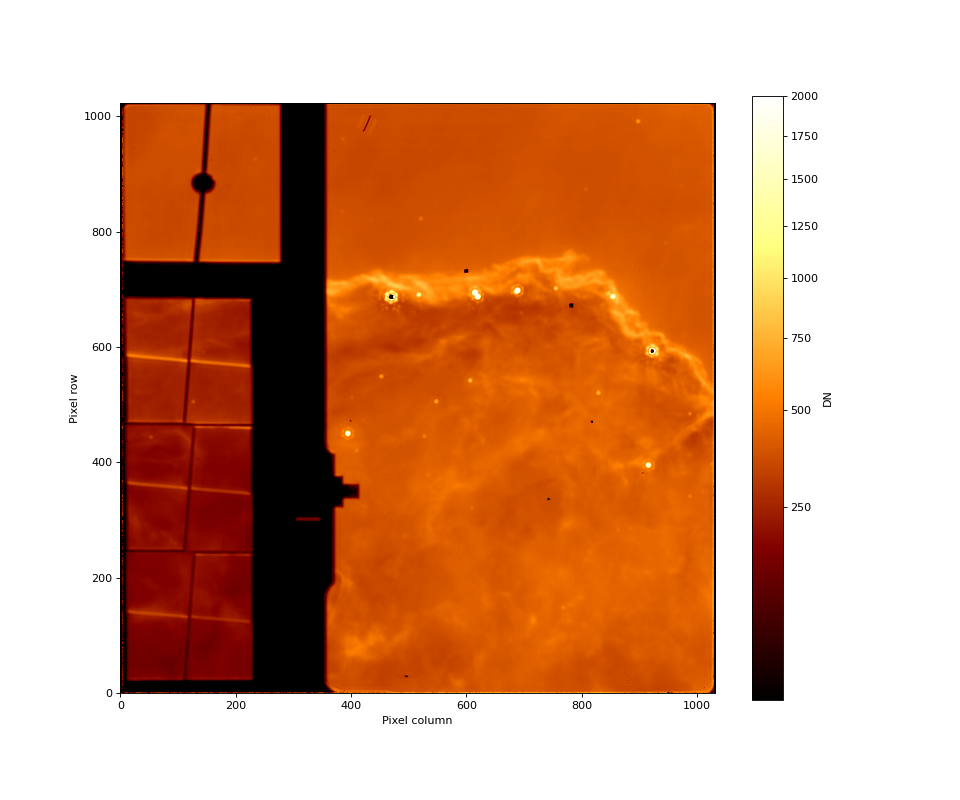

In [14]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

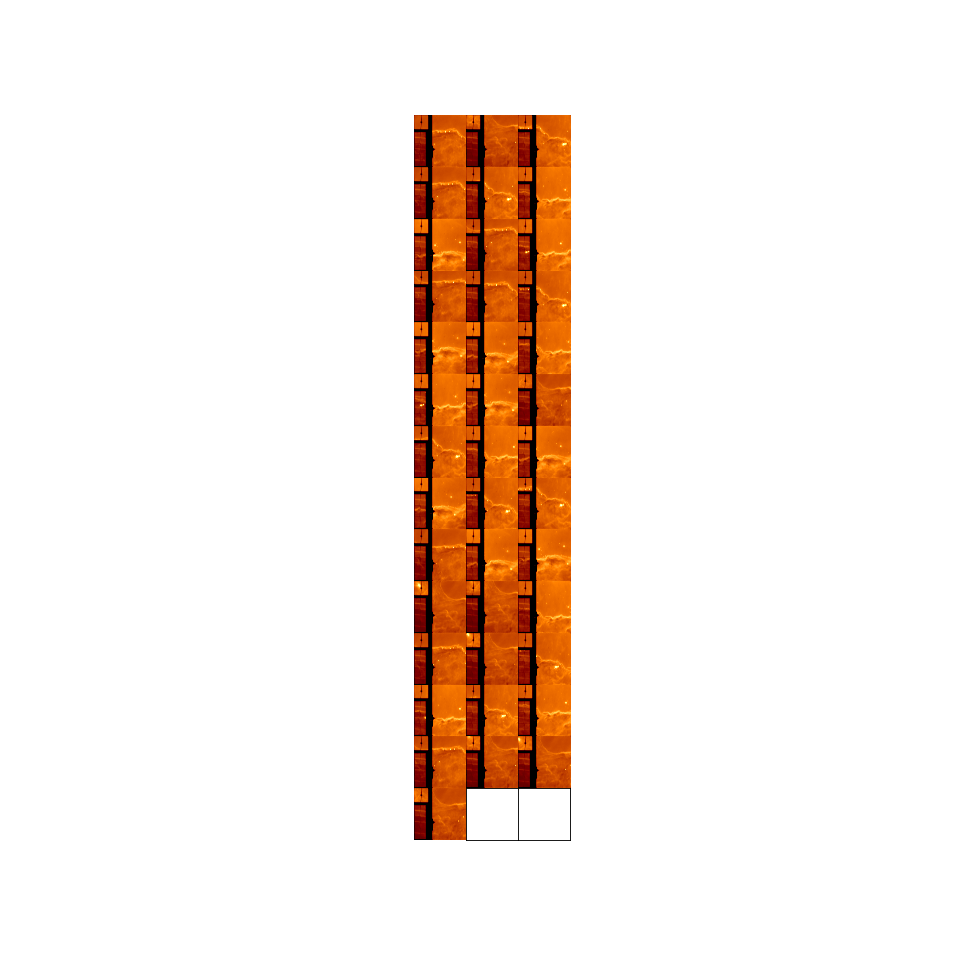

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F1800W/stage1/jw02731002004_02107_00006_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002005_02107_00003_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002003_02107_00004_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002004_02107_00001_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002003_02107_00002_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002002_02107_00002_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002001_02107_00005_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002004_02107_00003_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002002_02107_00006_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002004_02107_00004_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002004_02107_00007_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002003_02107_00005_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002001_02107_00003_mirimage_fixed_rate.fits', './F1800W/stage1/jw02731002001_02107_00006_mirimage_fixed_rate.fits', './F1800W/stage1/jw

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-07-25 14:10:49,476 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-07-25 14:10:49,477 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-07-25 14:10:49,478 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-07-25 14:10:49,479 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-07-25 14:10:51,667 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02107_00006_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 14:10:51,675 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 14:10:51,677 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 14:10:51,677 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 14:10:51,677 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 14:10:51,678 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 14:10

2022-07-25 14:10:51,711 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 14:10:51,711 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 14:10:51,712 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 14:10:51,712 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 14:10:51,712 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 14:10:51,712 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 14:10:51,712 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 14:10:51,713 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 14:10:51,713 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 14:10:5

2022-07-25 14:10:51,741 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 14:10:51,741 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 14:10:51,742 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 14:10:51,742 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 14:10:51,742 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 14:10:51,742 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 14:10:51,743 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 14:10:51,744 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-25 14:10:51,772 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 14:10:51,772 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 14:10:51,772 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 14:10:51,772 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 14:10:51,773 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 14:10:51,773 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 14:10:51,773 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 14:10:51,774 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 14:10:51,774 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-

2022-07-25 14:10:51,802 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 14:10:51,802 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 14:10:51,808 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 14:10:51,809 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 14:10:51,809 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 14:10:51,810 - stpipe.Image2Pipeline - INFO - Override for FLAT reference file is '/astro/dust_kg3/kgordon/Commissioning/ERO/Carina/RefFiles/flat_F1800W_kdg_10jun22.fits'.
2022-07-25 14:10:51,811 - stpipe.Image2Pipeline - INFO - Prefetch for FORE

2022-07-25 14:10:51,836 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 14:10:51,836 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 14:10:51,836 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 14:10:51,836 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 14:10:51,836 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 14:10:51,837 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02107_00006_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 14:10:51,840 - stpipe.Image2Pipeline - INFO - Prefetch for AREA r

2022-07-25 14:10:51,866 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 14:10:51,866 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 14:10:51,867 - stpipe.Image2Pipeline - INFO - Override for FLAT reference file is '/astro/dust_kg3/kgordon/Commissioning/ERO/Carina/RefFiles/flat_F1800W_kdg_10jun22.fits'.
2022-07-25 14:10:51,868 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 14:10:51,868 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 14:10:51,868 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 14:10:51,868 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 14:10:51,869 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 14:10:51,869

2022-07-25 14:10:51,894 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02107_00008_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 14:10:51,897 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 14:10:51,898 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 14:10:51,898 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 14:10:51,898 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 14:10:51,898 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 14:10

2022-07-25 14:10:51,927 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 14:10:51,927 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 14:10:51,927 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 14:10:51,928 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 14:10:51,928 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 14:10:51,928 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 14:10:51,928 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 14:10:51,928 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 14:10:51,929 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 14:10:5

2022-07-25 14:10:51,956 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 14:10:51,957 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 14:10:51,957 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 14:10:51,957 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 14:10:51,957 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 14:10:51,957 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 14:10:51,958 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 14:10:51,959 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-25 14:10:51,985 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 14:10:51,985 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 14:10:51,986 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 14:10:51,986 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 14:10:51,987 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 14:10:51,987 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 14:10:51,987 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 14:10:51,987 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 14:10:51,987 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-

2022-07-25 14:10:52,014 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 14:10:52,014 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 14:10:52,015 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 14:10:52,016 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 14:10:52,016 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 14:10:52,017 - stpipe.Image2Pipeline - INFO - Override for FLAT reference file is '/astro/dust_kg3/kgordon/Commissioning/ERO/Carina/RefFiles/flat_F1800W_kdg_10jun22.fits'.
2022-07-25 14:10:52,017 - stpipe.Image2Pipeline - INFO - Prefetch for FORE

2022-07-25 14:10:52,044 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 14:10:52,044 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 14:10:52,044 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 14:10:52,045 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 14:10:52,045 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 14:10:52,045 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02107_00002_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 14:10:52,048 - stpipe.Image2Pipeline - INFO - Prefetch for AREA r

2022-07-25 14:10:52,075 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 14:10:52,075 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 14:10:52,076 - stpipe.Image2Pipeline - INFO - Override for FLAT reference file is '/astro/dust_kg3/kgordon/Commissioning/ERO/Carina/RefFiles/flat_F1800W_kdg_10jun22.fits'.
2022-07-25 14:10:52,077 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 14:10:52,077 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 14:10:52,078 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 14:10:52,078 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 14:10:52,078 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 14:10:52,078

2022-07-25 14:10:52,121 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02107_00008_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 14:10:52,123 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 14:10:52,124 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 14:10:52,124 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 14:10:52,125 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 14:10:52,125 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 14:10

2022-07-25 14:10:52,151 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 14:10:52,152 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 14:10:52,152 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 14:10:52,152 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 14:10:52,152 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 14:10:52,152 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 14:10:52,153 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 14:10:52,153 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 14:10:52,153 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 14:10:5

2022-07-25 14:10:53,951 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 14:10:54,187 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002004_02107_00006_mirimage_fixed_rate.fits>,).
2022-07-25 14:10:54,189 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 14:10:54,215 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 14:10:54,215 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 14:10:54,2

2022-07-25 14:10:59,904 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 14:10:59,904 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 14:10:59,986 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 14:10:59,986 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 14:10:59,986 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 14:10:59,987 - stpipe.Image2Pipeline.photom - INFO -  filter: F1800W
2022-07-25 14:11:00,028 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 14:11:00,030 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 14:11:00,030 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 14:11:00,031 - stpipe.Image2

2022-07-25 14:11:06,188 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 14:11:06,188 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 14:11:06,189 - stpipe.Image2Pipeline.photom - INFO -  filter: F1800W
2022-07-25 14:11:06,230 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 14:11:06,231 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 14:11:06,232 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 14:11:06,232 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.494384
2022-07-25 14:11:06,249 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 14:11:06,499 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002003_02107_00004_mirimage_fixed_rate.fits>,).
2022-07-25 14:11:06,501 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre

2022-07-25 14:11:12,016 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 14:11:12,017 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.494384
2022-07-25 14:11:12,033 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 14:11:12,286 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002004_02107_00001_mirimage_fixed_rate.fits>,).
2022-07-25 14:11:12,287 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-25 14:11:18,123 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-25 14:11:18,146 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 14:11:18,290 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 14:11:18,749 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:11:19,074 - stpip

2022-07-25 14:11:23,989 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 14:11:24,140 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 14:11:24,611 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:11:24,940 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 14:11:25,412 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:11:25,749 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 14:11:26,219 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:11:26,550 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 14:11:27,019 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:11:27,366 - stpipe.Image2Pipeline.resample 

2022-07-25 14:11:31,483 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:11:31,811 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 14:11:32,268 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:11:32,597 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 14:11:33,047 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:11:33,391 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.213017624 -58.596962634 159.266804652 -58.611120634 159.294210264 -58.582816694 159.240455635 -58.568670140
2022-07-25 14:11:33,970 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1800W/stage2/jw02731002001_02107_00005_mirimage_fixed_i2d.fits
2022-07-25 14:11:33,971 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 14:11:33,971 - stpipe.Image2Pipeline - INFO - Finishe

2022-07-25 14:11:39,083 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.160835822 -58.640344604 159.214668661 -58.654524240 159.242150265 -58.626231321 159.188349853 -58.612063164
2022-07-25 14:11:39,711 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1800W/stage2/jw02731002004_02107_00003_mirimage_fixed_i2d.fits
2022-07-25 14:11:39,711 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 14:11:39,712 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1800W/stage1/jw02731002004_02107_00003_mirimage_fixed
2022-07-25 14:11:39,713 - stpipe.Image2Pipeline - INFO - Processing product ./F1800W/stage1/jw02731002002_02107_00006_mirimage_fixed
2022-07-25 14:11:39,713 - stpipe.Image2Pipeline - INFO - Working on input ./F1800W/stage1/jw02731002002_02107_00006_mirimage_fixed_rate.fits ...
2022-07-25 14:11:40,021 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw027

2022-07-25 14:11:45,413 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1800W/stage1/jw02731002002_02107_00006_mirimage_fixed
2022-07-25 14:11:45,415 - stpipe.Image2Pipeline - INFO - Processing product ./F1800W/stage1/jw02731002004_02107_00004_mirimage_fixed
2022-07-25 14:11:45,415 - stpipe.Image2Pipeline - INFO - Working on input ./F1800W/stage1/jw02731002004_02107_00004_mirimage_fixed_rate.fits ...
2022-07-25 14:11:45,723 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002004_02107_00004_mirimage_fixed_rate.fits>,).
2022-07-25 14:11:45,724 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_

2022-07-25 14:11:51,498 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002004_02107_00007_mirimage_fixed_rate.fits>,).
2022-07-25 14:11:51,499 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2022-07-25 14:11:51,698 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst

2022-07-25 14:11:57,594 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 14:11:57,677 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.182615974 -58.628110977 159.236336587 -58.642131147 159.263424196 -58.614059322 159.209899216 -58.599768860
2022-07-25 14:11:57,678 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.182615974 -58.628110977 159.236336587 -58.642131147 159.263424196 -58.614059322 159.209899216 -58.599768860
2022-07-25 14:11:57,678 - stpip

2022-07-25 14:12:03,528 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.207079748 -58.593748412 159.260757356 -58.607758400 159.287798774 -58.579681454 159.234316398 -58.565401121
2022-07-25 14:12:03,528 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.207079748 -58.593748412 159.260757356 -58.607758400 159.287798774 -58.579681454 159.234316398 -58.565401121
2022-07-25 14:12:03,529 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 14:12:03,597 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 14:12:03,866 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002001_02107_00003_mirimage_fixed_rate.fits>,).
2022-07-25 14:12:03,867 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-25 14:12:09,367 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 14:12:09,434 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 14:12:09,701 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002001_02107_00006_mirimage_fixed_rate.fits>,).
2022-07-25 14:12:09,702 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat': None, 'inverse': False}
2022-07-25 14:12:09,789 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:12:09,790 - stpipe.

2022-07-25 14:12:15,577 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:12:15,578 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:12:15,578 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:12:15,584 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:12:15,692 - stpipe.Image2Pipeline.flat_field - WARNING - /user/kgordon/Python/jwst/jwst/flatfield/flat_field.py:219: RuntimeWarning: invalid value encountered in multiply
  science.var_flat = science.data ** 2 / flat_data_squared * flat_err ** 2

2022-07-25 14:12:15,706 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
20

2022-07-25 14:12:21,405 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:12:21,514 - stpipe.Image2Pipeline.flat_field - WARNING - /user/kgordon/Python/jwst/jwst/flatfield/flat_field.py:219: RuntimeWarning: invalid value encountered in multiply
  science.var_flat = science.data ** 2 / flat_data_squared * flat_err ** 2

2022-07-25 14:12:21,528 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 14:12:21,798 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002002_02107_00007_mirimage_fixed_rate.fits>,).
2022-07-25 14:12:21,800 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_o

2022-07-25 14:12:27,327 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 14:12:27,609 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002001_02107_00008_mirimage_fixed_rate.fits>,).
2022-07-25 14:12:27,610 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 14:12:27,634 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 14:12:27,634 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 14:12:

2022-07-25 14:12:33,529 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 14:12:33,529 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 14:12:33,613 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 14:12:33,614 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 14:12:33,614 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 14:12:33,614 - stpipe.Image2Pipeline.photom - INFO -  filter: F1800W
2022-07-25 14:12:33,655 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 14:12:33,657 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 14:12:33,657 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 14:12:33,658 - stpipe.Image2

2022-07-25 14:12:39,496 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 14:12:39,496 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 14:12:39,496 - stpipe.Image2Pipeline.photom - INFO -  filter: F1800W
2022-07-25 14:12:39,538 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 14:12:39,540 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 14:12:39,540 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 14:12:39,541 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.494384
2022-07-25 14:12:39,558 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 14:12:39,848 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002003_02107_00008_mirimage_fixed_rate.fits>,).
2022-07-25 14:12:39,849 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre

2022-07-25 14:12:45,468 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 14:12:45,468 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.494384
2022-07-25 14:12:45,484 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 14:12:45,768 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002002_02107_00008_mirimage_fixed_rate.fits>,).
2022-07-25 14:12:45,770 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-25 14:12:51,697 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-25 14:12:51,723 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 14:12:51,867 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 14:12:52,324 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:12:52,649 - stpip

2022-07-25 14:12:57,611 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 14:12:57,759 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 14:12:58,208 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:12:58,538 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 14:12:58,999 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:12:59,332 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 14:12:59,808 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:13:00,139 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 14:13:00,619 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:13:00,965 - stpipe.Image2Pipeline.resample 

2022-07-25 14:13:05,007 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:13:05,337 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 14:13:05,795 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:13:06,124 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 14:13:06,583 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:13:06,929 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.183528691 -58.625407674 159.237347390 -58.639578166 159.264799518 -58.611280585 159.211013241 -58.597121560
2022-07-25 14:13:07,521 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1800W/stage2/jw02731002003_02107_00001_mirimage_fixed_i2d.fits
2022-07-25 14:13:07,522 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 14:13:07,522 - stpipe.Image2Pipeline - INFO - Finishe

2022-07-25 14:13:12,811 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.176184935 -58.624799766 159.229999679 -58.638973366 159.257457362 -58.610677372 159.203675029 -58.596515240
2022-07-25 14:13:13,410 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1800W/stage2/jw02731002003_02107_00003_mirimage_fixed_i2d.fits
2022-07-25 14:13:13,410 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 14:13:13,411 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1800W/stage1/jw02731002003_02107_00003_mirimage_fixed
2022-07-25 14:13:13,412 - stpipe.Image2Pipeline - INFO - Processing product ./F1800W/stage1/jw02731002004_02107_00005_mirimage_fixed
2022-07-25 14:13:13,412 - stpipe.Image2Pipeline - INFO - Working on input ./F1800W/stage1/jw02731002004_02107_00005_mirimage_fixed_rate.fits ...
2022-07-25 14:13:13,757 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw027

2022-07-25 14:13:19,362 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1800W/stage1/jw02731002004_02107_00005_mirimage_fixed
2022-07-25 14:13:19,363 - stpipe.Image2Pipeline - INFO - Processing product ./F1800W/stage1/jw02731002001_02107_00001_mirimage_fixed
2022-07-25 14:13:19,363 - stpipe.Image2Pipeline - INFO - Working on input ./F1800W/stage1/jw02731002001_02107_00001_mirimage_fixed_rate.fits ...
2022-07-25 14:13:19,714 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002001_02107_00001_mirimage_fixed_rate.fits>,).
2022-07-25 14:13:19,715 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_

2022-07-25 14:13:25,701 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002001_02107_00004_mirimage_fixed_rate.fits>,).
2022-07-25 14:13:25,703 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2022-07-25 14:13:25,895 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst

2022-07-25 14:13:31,867 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 14:13:31,954 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.151914390 -58.659204526 159.205670450 -58.673237587 159.232807044 -58.645172257 159.179247039 -58.630868964
2022-07-25 14:13:31,954 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.151914390 -58.659204526 159.205670450 -58.673237587 159.232807044 -58.645172257 159.179247039 -58.630868964
2022-07-25 14:13:31,954 - stpip

2022-07-25 14:13:37,887 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.145503999 -58.657549273 159.199255059 -58.671584874 159.226395272 -58.643520826 159.172840297 -58.629215003
2022-07-25 14:13:37,888 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.145503999 -58.657549273 159.199255059 -58.671584874 159.226395272 -58.643520826 159.172840297 -58.629215003
2022-07-25 14:13:37,888 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 14:13:38,000 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 14:13:38,306 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002005_02107_00004_mirimage_fixed_rate.fits>,).
2022-07-25 14:13:38,307 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-25 14:13:43,925 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 14:13:44,036 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 14:13:44,345 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002002_02107_00005_mirimage_fixed_rate.fits>,).
2022-07-25 14:13:44,346 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat': None, 'inverse': False}
2022-07-25 14:13:44,436 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:13:44,437 - stpipe.

2022-07-25 14:13:50,400 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:13:50,400 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:13:50,401 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:13:50,407 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:13:50,520 - stpipe.Image2Pipeline.flat_field - WARNING - /user/kgordon/Python/jwst/jwst/flatfield/flat_field.py:219: RuntimeWarning: invalid value encountered in multiply
  science.var_flat = science.data ** 2 / flat_data_squared * flat_err ** 2

2022-07-25 14:13:50,536 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
20

2022-07-25 14:13:56,441 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 14:13:56,554 - stpipe.Image2Pipeline.flat_field - WARNING - /user/kgordon/Python/jwst/jwst/flatfield/flat_field.py:219: RuntimeWarning: invalid value encountered in multiply
  science.var_flat = science.data ** 2 / flat_data_squared * flat_err ** 2

2022-07-25 14:13:56,569 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 14:13:56,872 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002005_02107_00002_mirimage_fixed_rate.fits>,).
2022-07-25 14:13:56,873 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_o

2022-07-25 14:14:02,545 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 14:14:02,853 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002003_02107_00006_mirimage_fixed_rate.fits>,).
2022-07-25 14:14:02,854 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 14:14:02,879 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 14:14:02,879 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 14:14:

2022-07-25 14:14:08,858 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 14:14:08,858 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 14:14:08,939 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 14:14:08,939 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 14:14:08,939 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 14:14:08,940 - stpipe.Image2Pipeline.photom - INFO -  filter: F1800W
2022-07-25 14:14:08,981 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 14:14:08,983 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 14:14:08,983 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 14:14:08,984 - stpipe.Image2

2022-07-25 14:14:14,945 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 14:14:14,946 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 14:14:14,946 - stpipe.Image2Pipeline.photom - INFO -  filter: F1800W
2022-07-25 14:14:14,988 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 14:14:14,990 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 14:14:14,990 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 14:14:14,991 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.494384
2022-07-25 14:14:15,007 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 14:14:15,313 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002003_02107_00007_mirimage_fixed_rate.fits>,).
2022-07-25 14:14:15,315 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre

2022-07-25 14:14:21,024 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 14:14:21,024 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.494384
2022-07-25 14:14:21,040 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 14:14:21,353 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002002_02107_00003_mirimage_fixed_rate.fits>,).
2022-07-25 14:14:21,354 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-25 14:14:27,392 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-25 14:14:27,417 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 14:14:27,563 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 14:14:28,041 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:14:28,368 - stpip

2022-07-25 14:14:33,464 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 14:14:33,611 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 14:14:34,088 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:14:34,413 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 14:14:34,874 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:14:35,209 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 14:14:35,680 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:14:36,023 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 14:14:36,485 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:14:36,825 - stpipe.Image2Pipeline.resample 

2022-07-25 14:14:41,052 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:14:41,384 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 14:14:41,845 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:14:42,177 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 14:14:42,663 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 14:14:43,009 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.152829406 -58.656501007 159.206683603 -58.670684311 159.234185035 -58.642393260 159.180363288 -58.628221445
2022-07-25 14:14:43,606 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1800W/stage2/jw02731002005_02107_00001_mirimage_fixed_i2d.fits
2022-07-25 14:14:43,607 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 14:14:43,607 - stpipe.Image2Pipeline - INFO - Finishe

2022-07-25 14:14:49,099 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.154031297 -58.654701488 159.207883333 -58.668884157 159.235382117 -58.640592783 159.181562529 -58.626421602
2022-07-25 14:14:49,678 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1800W/stage2/jw02731002005_02107_00006_mirimage_fixed_i2d.fits
2022-07-25 14:14:49,679 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 14:14:49,679 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1800W/stage1/jw02731002005_02107_00006_mirimage_fixed
2022-07-25 14:14:49,680 - stpipe.Image2Pipeline - INFO - ... ending calwebb_image2
2022-07-25 14:14:49,680 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0932.pmap
2022-07-25 14:14:49,681 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0932.pmap
2022-07-25 14:14:49,681 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0932.pmap
2022-07-25 14:14:49,681 - stpipe.Im

2022-07-25 14:15:06,260 - stpipe.Image2Pipeline - INFO - Saved model in ./F1800W/stage2/jw02731002001_02107_00004_mirimage_fixed_cal.fits
2022-07-25 14:15:06,875 - stpipe.Image2Pipeline - INFO - Saved model in ./F1800W/stage2/jw02731002005_02107_00005_mirimage_fixed_cal.fits
2022-07-25 14:15:07,483 - stpipe.Image2Pipeline - INFO - Saved model in ./F1800W/stage2/jw02731002005_02107_00004_mirimage_fixed_cal.fits
2022-07-25 14:15:08,102 - stpipe.Image2Pipeline - INFO - Saved model in ./F1800W/stage2/jw02731002002_02107_00005_mirimage_fixed_cal.fits
2022-07-25 14:15:08,718 - stpipe.Image2Pipeline - INFO - Saved model in ./F1800W/stage2/jw02731002004_02107_00002_mirimage_fixed_cal.fits
2022-07-25 14:15:09,372 - stpipe.Image2Pipeline - INFO - Saved model in ./F1800W/stage2/jw02731002005_02107_00002_mirimage_fixed_cal.fits
2022-07-25 14:15:09,974 - stpipe.Image2Pipeline - INFO - Saved model in ./F1800W/stage2/jw02731002003_02107_00006_mirimage_fixed_cal.fits
2022-07-25 14:15:11,027 - stpipe.I

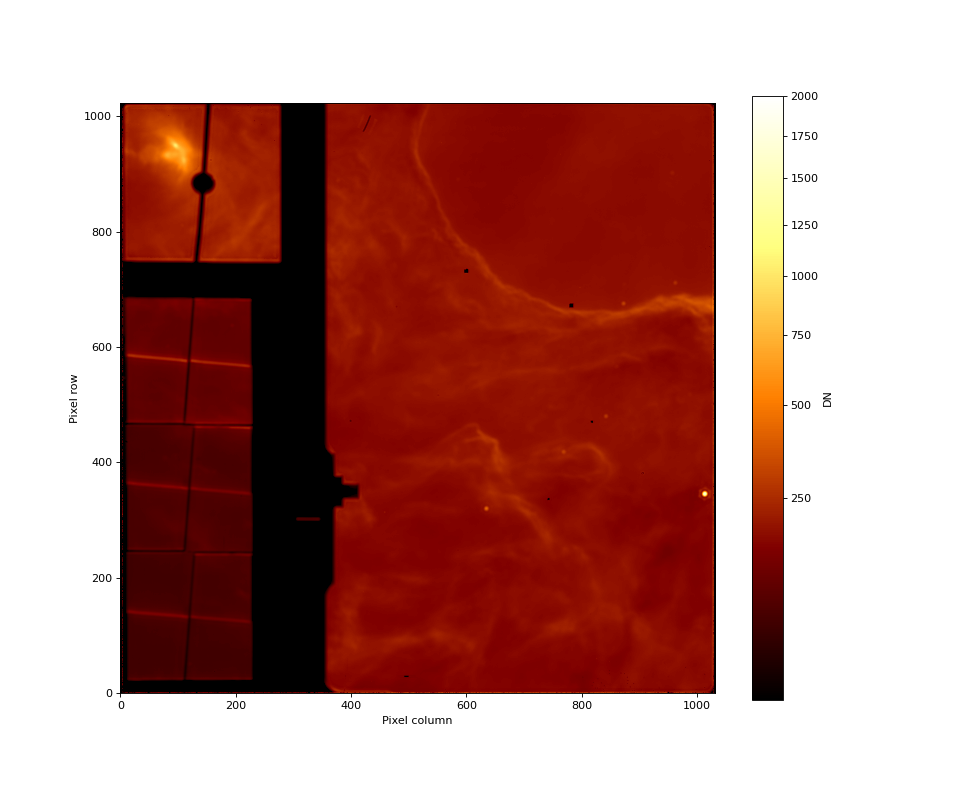

In [18]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

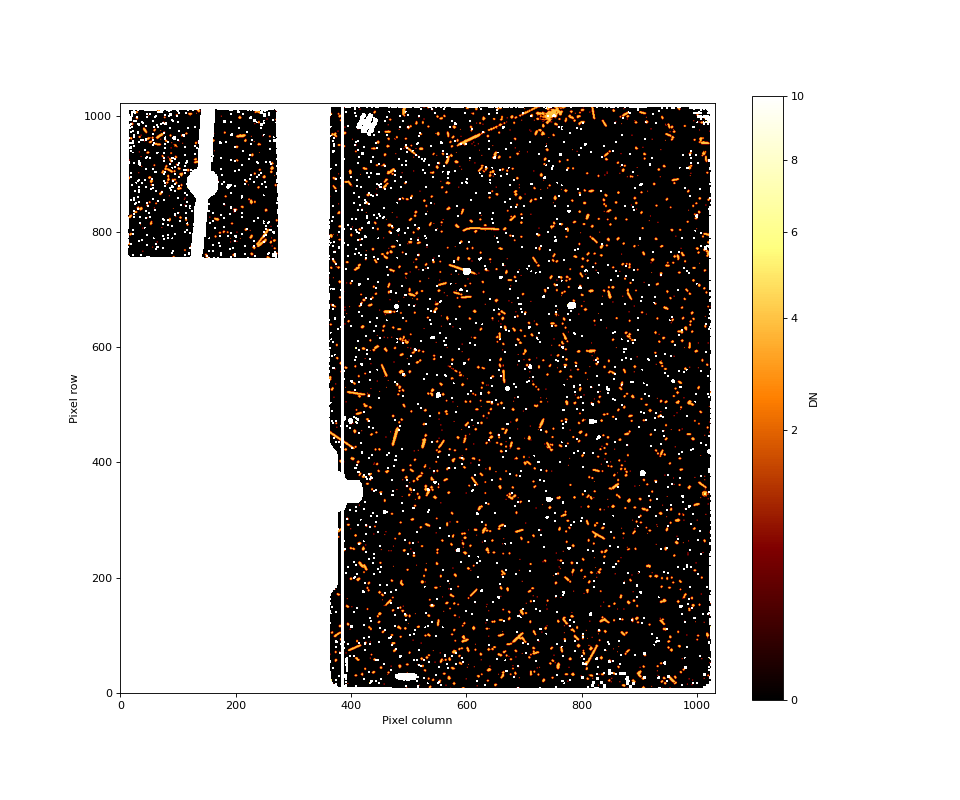

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

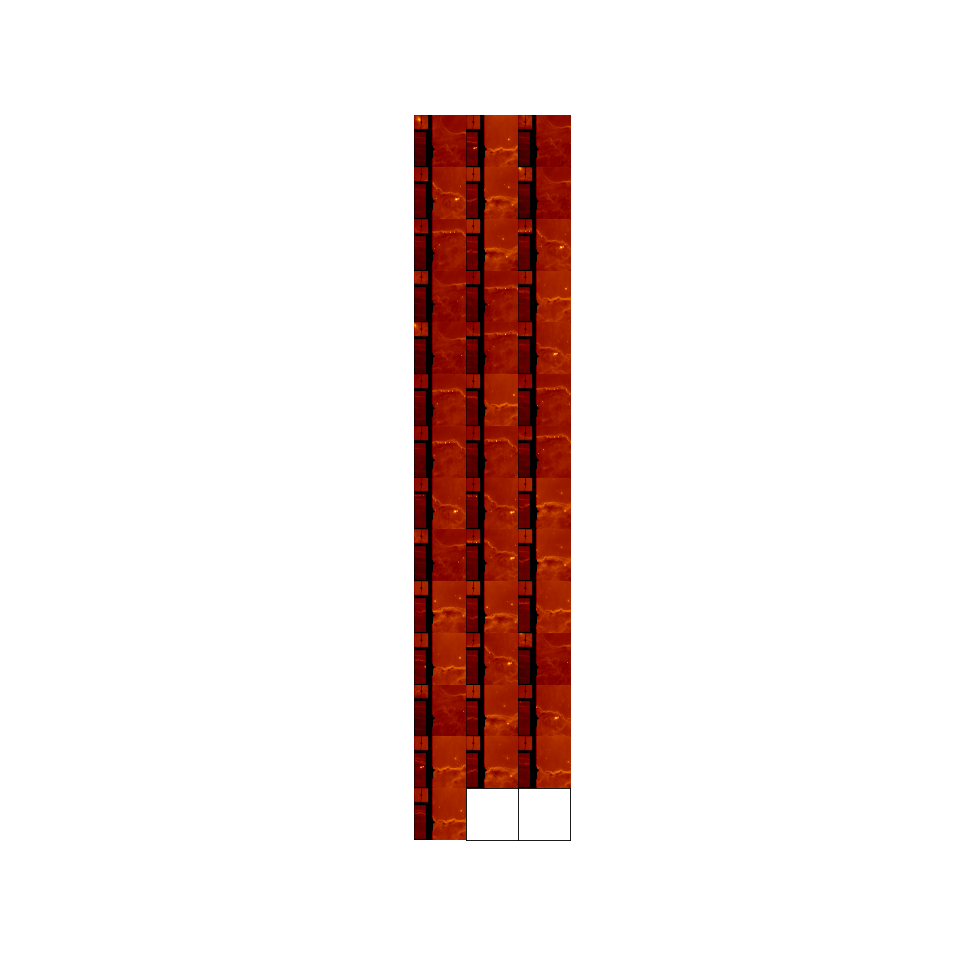

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}1*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)
    
# update the WCS for mosaic tile 3
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}3*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile3_shifts)
    
# update the WCS for mosaic tile 4
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}4*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile4_shifts)
    
# update the WCS for mosaic tile 5
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}5*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile5_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F1800W/stage2/jw02731002001_02107_00006_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002004_02107_00002_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002002_02107_00005_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002001_02107_00002_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002002_02107_00001_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002003_02107_00005_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002002_02107_00004_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002001_02107_00005_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002001_02107_00008_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002005_02107_00002_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002003_02107_00004_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002002_02107_00006_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002003_02107_00006_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02731002001_02107_00001_mirimag

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-25 14:16:16,348 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-25 14:16:16,348 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 14:16:16,349 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-25 14:16:16,350 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-07-25 14:16:16,918 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 14:16:16,919 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-07-25 14:16:24,598 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-07-25 14:16:24,600 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 5.2, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-07-25 14:17:20,001 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 14:17:20,765 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 14:17:21,528 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 14:17:22,294 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 14:17:23,059 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 14:17:23,824 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 14:17:24,606 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 14:17:25,369 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 14:17:26,129 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (102

2022-07-25 14:17:53,381 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 77160 (7.30%)
2022-07-25 14:17:53,459 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 113542 (10.74%)
2022-07-25 14:17:53,538 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 62153 (5.88%)
2022-07-25 14:17:53,616 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 83114 (7.86%)
2022-07-25 14:17:53,694 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 42664 (4.04%)
2022-07-25 14:17:53,772 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 83789 (7.93%)
2022-07-25 14:17:53,849 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 119755 (11.33%)
2022-07-25 14:17:53,926 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 17264 (1.63%)
2022-07-25 14:17:54,004 - st

2022-07-25 14:18:37,145 - stpipe.Image3Pipeline.resample - INFO - Step resample running with args (<ModelContainer>,).
2022-07-25 14:18:37,147 - stpipe.Image3Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': [159.21261854583094, -58.620018010874205], 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': 0.11, 'single': False, 'blendheaders': True, 'allowed_memory': None}
2022-07-25 14:18:37,168 - stpipe.Image3Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 14:18:37,683 - stpipe.Image3Pipeline.resample - INFO - Blendi

2022-07-25 14:19:41,002 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:19:41,943 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:19:42,891 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:19:43,858 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:19:44,829 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:19:45,789 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:19:46,756 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:19:47,703 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:19:48,649 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:19:49,609 - stpipe.Image3Pipelin

2022-07-25 14:20:53,562 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:20:54,513 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:20:55,458 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:20:56,419 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:20:57,371 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:20:58,317 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:20:59,266 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:21:00,217 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:21:01,176 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 14:21:02,135 - stpipe.Image3Pipelin

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

In [26]:
# Read in the source catalog
miri_source_cat = ascii.read(miri_catalog_file)

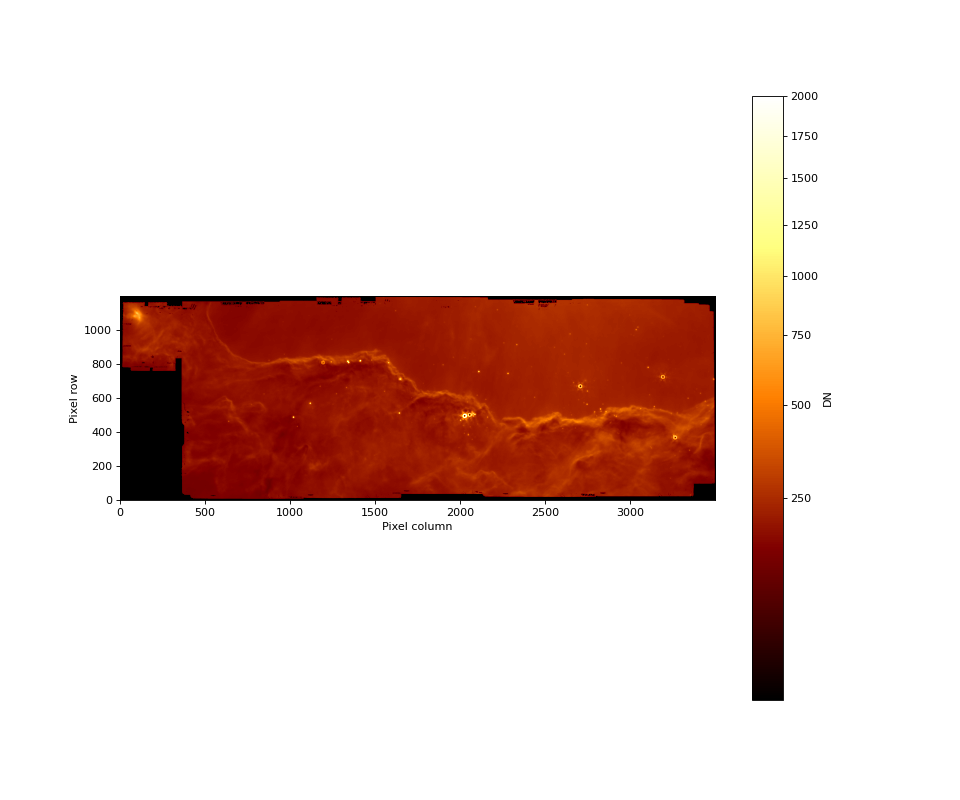

In [27]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

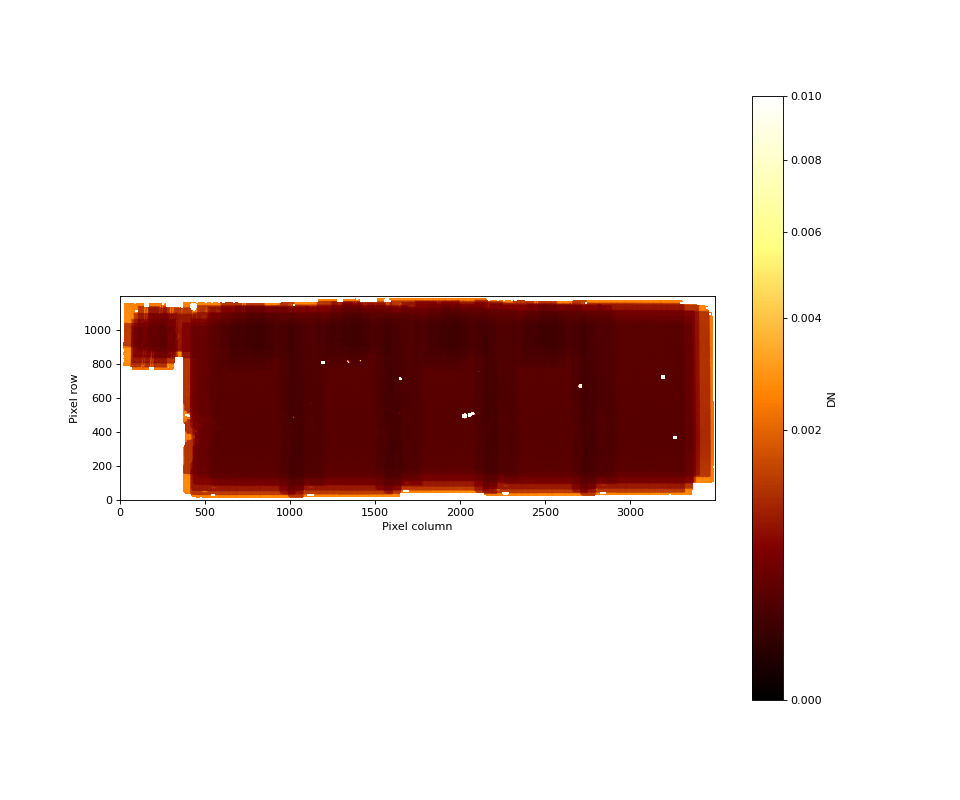

In [28]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

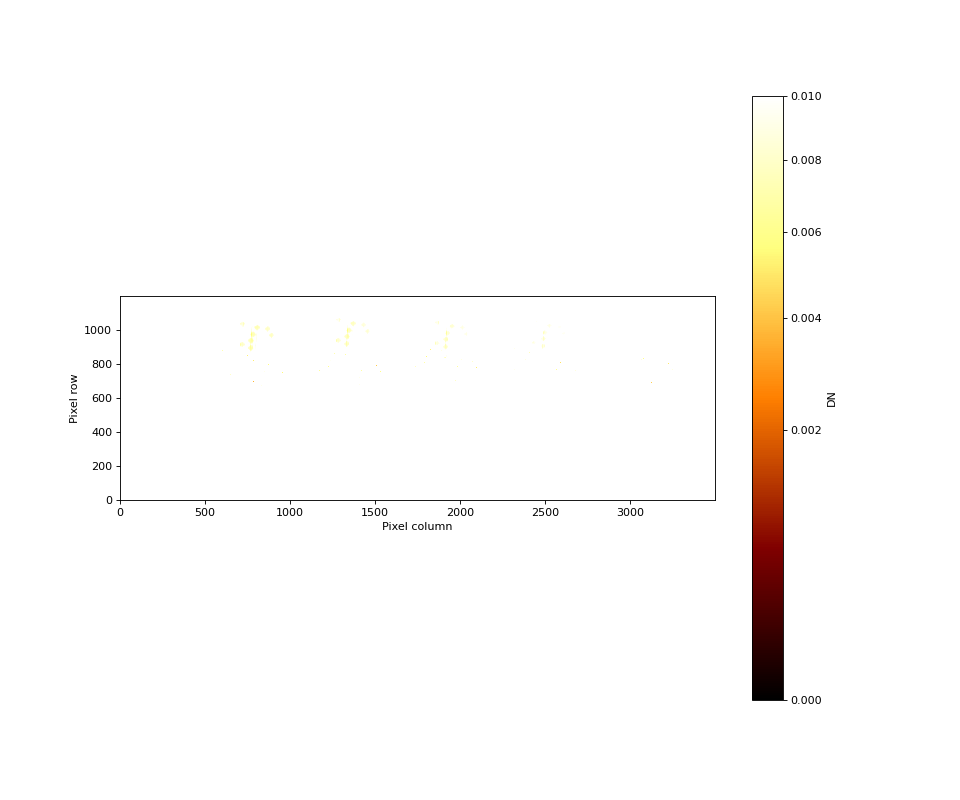

In [29]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

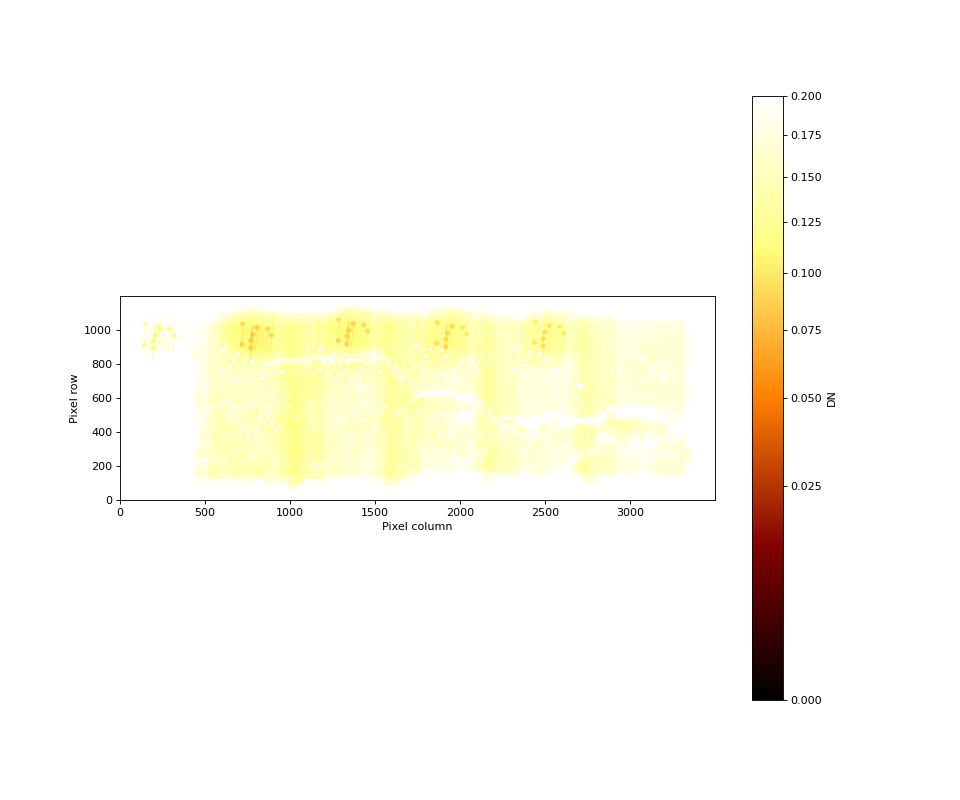

In [30]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

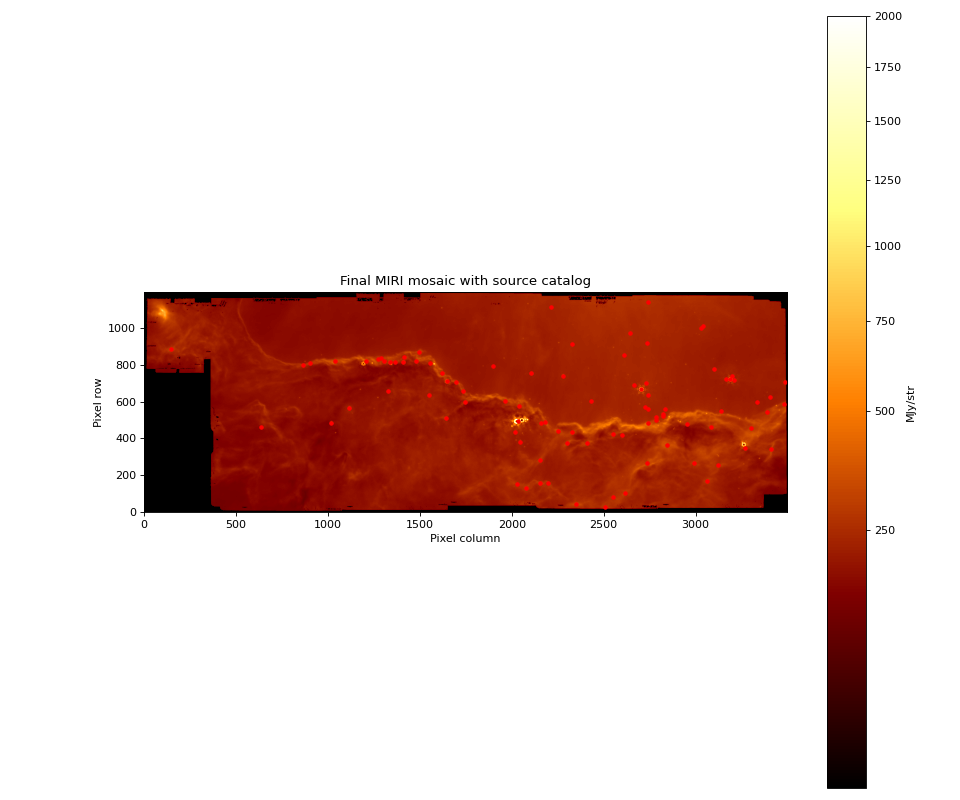

In [31]:
# Show the catalog sources on the mosaic
overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                title='Final MIRI mosaic with source catalog', dmap=dmap)